# Задача

В данной работе решается задача регрессии, с использованием разведовачного анализа данных, подготовке их к прогнозированию и непосредственно самим прогнозированием.

Для прогнозирования использовались такие методы, как:
- Линейная регрессия
- KNN
- Наивный байес
- SVM
- Дерево решений
- Случайный лес
- Голосование
- Бэггинг
- Стэккинг
- Градиентный спуск
- Градиентный бустинг
- ...

**Разведочный анализ данных** (англ. **exploratory data analysis, EDA**) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

# Предварительная обработка данных

In [1]:
import numpy as np                # математика
import pandas as pd               # работа с табличными данными

import matplotlib.pyplot as plt   # визуализация
import seaborn                    # визуализация (красивее, более высокоуровневые функции)
from sklearn.preprocessing import LabelEncoder        # класс для кодирования признаков
from statistics import mean, pvariance, variance      # среднее арифметическое и дисперсии
from sklearn.model_selection import train_test_split  # функция для разделения данных на train и test
from sklearn.preprocessing import StandardScaler    # класс для нормализации
from sklearn.linear_model import LinearRegression   # класс для построения уравнения
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # метрики
from sklearn.metrics import classification_report, f1_score, fbeta_score, roc_auc_score, confusion_matrix, accuracy_score

## Загрузка данных

In [2]:
!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/26688/2079920/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1685583442&Signature=gpD%2FUKBnOPPIsF2upOQVfnjXSv6lSgI8JRjK%2FcgjrW0vQ7Cxx40n4jJdqx3yCF631dX060volGjxsTcujl67jijiZ%2B46PLIwZYtpmLet1h1zKp2madg3iAwXDAA%2BkEpq71UJgrakYdFhAO9D0zAd%2BXG63FhL%2F87aQf8Fro808DoWarJVLNBCm%2FlrqMHRzCEP%2BDspOJoOe7jdYA6Sxj%2BNbMfawjrht8wDilFKsUAU6P%2FSG8H6%2FXcashVADp2ym%2BRmKANvQSkuW5VDOLOqq%2BWUBQ6d9VdzErbcZrQpVAy0yTirRANdlnShObbotRvYgSeKIKgHS%2F8vUFviffhjDXjkMw%3D%3D&response-content-disposition=attachment%3B+filename%3Dcalifornia-house-prices.zip" -O california-house-prices.zip

--2023-05-30 01:22:40--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/26688/2079920/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1685583442&Signature=gpD%2FUKBnOPPIsF2upOQVfnjXSv6lSgI8JRjK%2FcgjrW0vQ7Cxx40n4jJdqx3yCF631dX060volGjxsTcujl67jijiZ%2B46PLIwZYtpmLet1h1zKp2madg3iAwXDAA%2BkEpq71UJgrakYdFhAO9D0zAd%2BXG63FhL%2F87aQf8Fro808DoWarJVLNBCm%2FlrqMHRzCEP%2BDspOJoOe7jdYA6Sxj%2BNbMfawjrht8wDilFKsUAU6P%2FSG8H6%2FXcashVADp2ym%2BRmKANvQSkuW5VDOLOqq%2BWUBQ6d9VdzErbcZrQpVAy0yTirRANdlnShObbotRvYgSeKIKgHS%2F8vUFviffhjDXjkMw%3D%3D&response-content-disposition=attachment%3B+filename%3Dcalifornia-house-prices.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30978210 (30M) [application/zip]
Saving to: ‘california-hous

Распакуем данные

In [3]:
!unzip -o california-house-prices.zip

Archive:  california-house-prices.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
# читаем csv файл и кладём в переменную data0
data0 = pd.read_csv("train.csv")

In [ ]:
# выводим столбец Sold Price в виде numpy массива
data0["Sold Price"].values

array([3825000.,  505000.,  140000., ..., 2300000.,  500000.,  760000.])

In [ ]:
# получим кол-во строк в наших данных
len(data0)

47439

In [5]:
# показать данные из колонки Sold Price, 
# .dropna() - удалить пропуски (NA или NaN) 
# .values - представить в виде nympy массива 
data3 = data0['Sold Price'].dropna().values

In [ ]:
len(data3)

47439

Как видим в столбце Sold Price нет пропусков

## Предварительный анализ данных

In [ ]:
# общая информация о данных:
# - список столбцов
# их типов данных 
# и количество заполненных в столбце значений
# object здесь -- строковый тип данных
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  int64  
 1   Address                      47439 non-null  object 
 2   Sold Price                   47439 non-null  float64
 3   Summary                      47089 non-null  object 
 4   Type                         47439 non-null  object 
 5   Year built                   46394 non-null  float64
 6   Heating                      40974 non-null  object 
 7   Cooling                      36817 non-null  object 
 8   Parking                      46531 non-null  object 
 9   Lot                          33258 non-null  float64
 10  Bedrooms                     44567 non-null  object 
 11  Bathrooms                    43974 non-null  float64
 12  Full bathrooms               39574 non-null  float64
 13  Total interior l

**Квартили** — числовые значения признака, которые делят упорядоченную по возрастанию совокупность на четыре равных части. Раз квартили делят совокупность на четыре части, то квартилей бывает три варианта: первый (нижний), второй(средний), третий (верхний). Второй квартиль это и есть медиана.

**Стандартное отклонение** -- характеризует степень отклонения данных от среднего значения.

Определяется как квадратный корень из дисперсии. В отличие от дисперсии, стандартное отклонение исчисляется в тех же единицах измерения, что и исходные данные.

- Чем больше стандартное отклонение, тем шире распределение, тем больше случайных ошибок и тем хуже точность метода; 
- Чем меньше стандартное отклонение, тем более узкое и четкое распределение, тем меньше случайная ошибка и тем лучше точность метода.

Формула вычисления стандартного отклонения:

![](https://www.nexus.ua/images/info/standarddeviation.png)

In [6]:
# статистическая информация о числовых признаках
# mean -- среднее
# std -- стандартное отклонение
# 25%, 50%, 75% -- квартили (медианы)
data0.describe()

Id    Sold Price    Year built           Lot     Bathrooms  \
count  47439.000000  4.743900e+04  46394.000000  3.325800e+04  43974.000000   
mean   23719.000000  1.296050e+06   1956.634888  2.353383e+05      2.355642   
std    13694.604047  1.694452e+06    145.802456  1.192507e+07      1.188805   
min        0.000000  1.005000e+05      0.000000  0.000000e+00      0.000000   
25%    11859.500000  5.650000e+05   1946.000000  4.991000e+03      2.000000   
50%    23719.000000  9.600000e+05   1967.000000  6.502000e+03      2.000000   
75%    35578.500000  1.525000e+06   1989.000000  1.045400e+04      3.000000   
max    47438.000000  9.000000e+07   9999.000000  1.897474e+09     24.000000   

       Full bathrooms  Total interior livable area  Total spaces  \
count    39574.000000                 4.491300e+04  46523.000000   
mean         2.094961                 5.774587e+03      1.567117   
std          0.963320                 8.324363e+05      9.011608   
min          1.000000                 1.000000e+00    -15.000000   
25%          2.000000                 1.187000e+03      0.000000   
50%          2.000000                 1.566000e+03      1.000000   
75%          2.000000                 2.142000e+03      2.000000   
max         17.000000                 1.764164e+08   1000.000000   

       Garage spaces  Elementary School Score  Elementary School Distance  \
count   46522.000000             42543.000000                42697.000000   
mean        1.491746                 5.720824                    1.152411   
std         8.964319                 2.103350                    2.332367   
min       -15.000000                 1.000000                    0.000000   
25%         0.000000                 4.000000                    0.300000   
50%         1.000000                 6.000000                    0.500000   
75%         2.000000                 7.000000                    1.000000   
max      1000.000000                10.000000                   57.200000   

       Middle School Score  Middle School Distance  High School Score  \
count         30734.000000            30735.000000       42220.000000   
mean              5.317206                1.691593           6.134344   
std               2.002768                2.462879           1.984711   
min               1.000000                0.000000           1.000000   
25%               4.000000                0.600000           5.000000   
50%               5.000000                1.000000           6.000000   
75%               7.000000                1.800000           8.000000   
max               9.000000               57.200000          10.000000   

       High School Distance  Tax assessed value  Annual tax amount  \
count          42438.000000        4.378700e+04       43129.000000   
mean               2.410366        7.863118e+05        9956.843817   
std                3.596120        1.157796e+06       13884.254976   
min                0.000000        0.000000e+00           0.000000   
25%                0.800000        2.549615e+05        3467.000000   
50%                1.300000        5.475240e+05        7129.000000   
75%                2.400000        9.371625e+05       12010.000000   
max               73.900000        4.590000e+07      552485.000000   

       Listed Price  Last Sold Price           Zip  
count  4.743900e+04     2.967300e+04  47439.000000  
mean   1.315890e+06     8.078537e+05  93279.178587  
std    2.628695e+06     1.177903e+06   2263.459104  
min    0.000000e+00     0.000000e+00  85611.000000  
25%    5.745000e+05     3.350000e+05  90220.000000  
50%    9.490000e+05     5.980000e+05  94114.000000  
75%    1.498844e+06     9.500000e+05  95073.000000  
max    4.025320e+08     9.000000e+07  96155.000000

<Axes: ylabel='Count'>

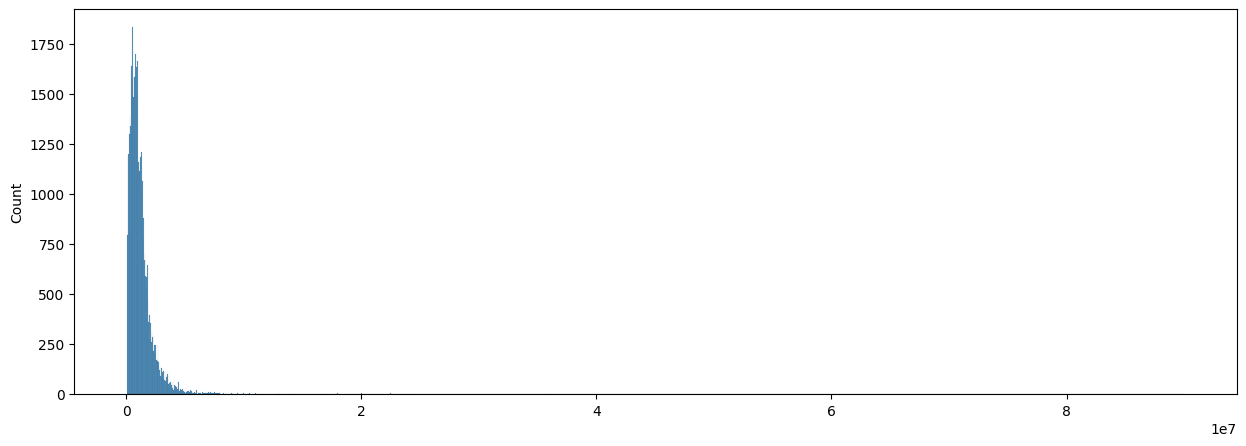

In [7]:
# гистограмма - столбчатая диаграмма
# левая и правая граница столбца задают интервал для значений величины,
# высота столбца -- число значений из массива, которые попали в интервал
plt.figure(figsize=(15, 5))
seaborn.histplot( data0['Sold Price'].dropna().values )

# bins=12 -- число столбцов (если не указано, определяется автоматически)

## Очистка данных

In [8]:
import matplotlib.ticker as ticker

# настройка эстетики графика
# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# themes = ['paper', 'notebook', 'talk', 'poster']  # определяет размер элементов, шрифтов

seaborn.set_theme('talk')
# seaborn.set_style('darkgrid')

Построим диаграмму размаха, либо её ещё называют ящик с усами.

<Axes: >

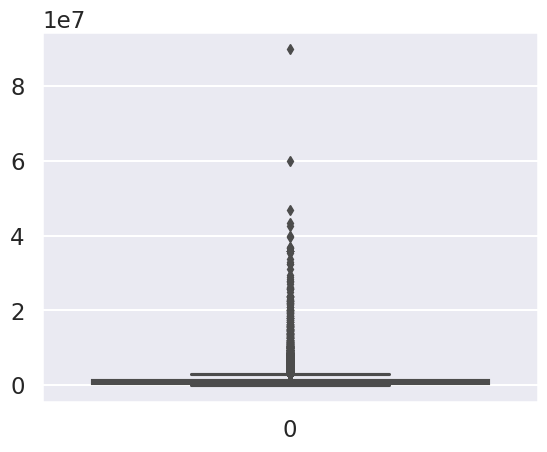

In [9]:
seaborn.boxplot( data0['Sold Price'].values )

Видим, что есть очень много выбросов. Избавимся от них.

In [10]:
fare_mean = data0['Sold Price'].values.mean() # среднее арифметическое
fare_std = data0['Sold Price'].values.std() # стандартное отклонение, среднее отклонение от среднего значения

# используем критерий для отсечения выбросов: значение не находится в интервале mean ± 3 std
# получим список true и false, которые можно использовать как маску
mask = (data0['Sold Price'] > fare_mean - 3*fare_std)  & (data0 [ 'Sold Price' ] < fare_mean + 3*fare_std)


In [11]:
len(data0)

47439

Применим маску.

<Axes: >

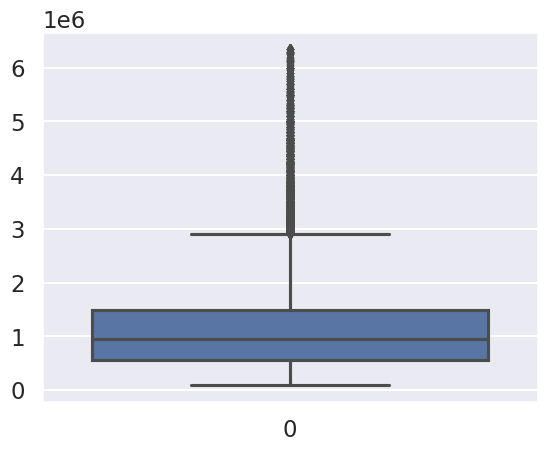

In [12]:
data1 = data0[mask]
seaborn.boxplot(data1['Sold Price'])

In [13]:
len(data1)

46928

Как видим выбросы ещё остались, но это не критично.

Построим гистограмму по столбцу Sold Price.

<Axes: ylabel='Count'>

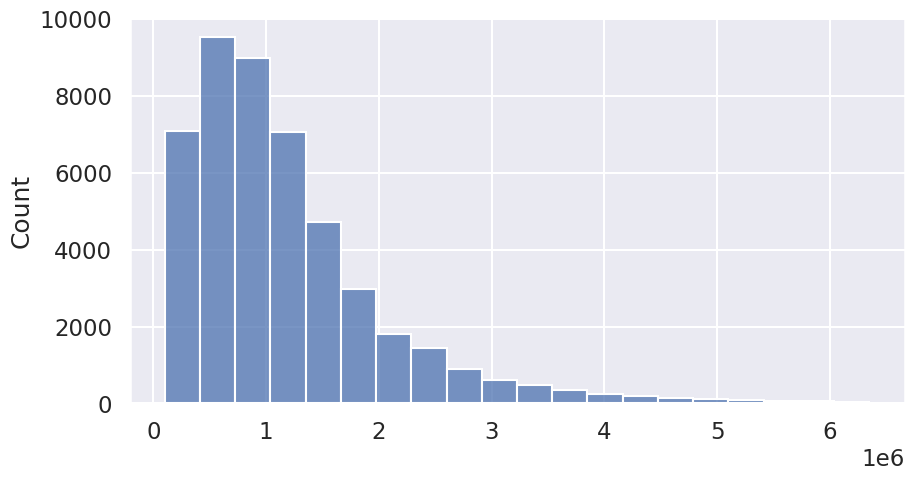

In [14]:
plt.figure(figsize=(10, 5)) # задаёт размер фигуры в inch
seaborn.histplot(data1['Sold Price'].values, bins=20)
# bins=20 -- число столбцов на диаграмме (если не указано, определяется автоматически)

Построим Displot по тем же данным, но удалим строчки с нулевыми признаками

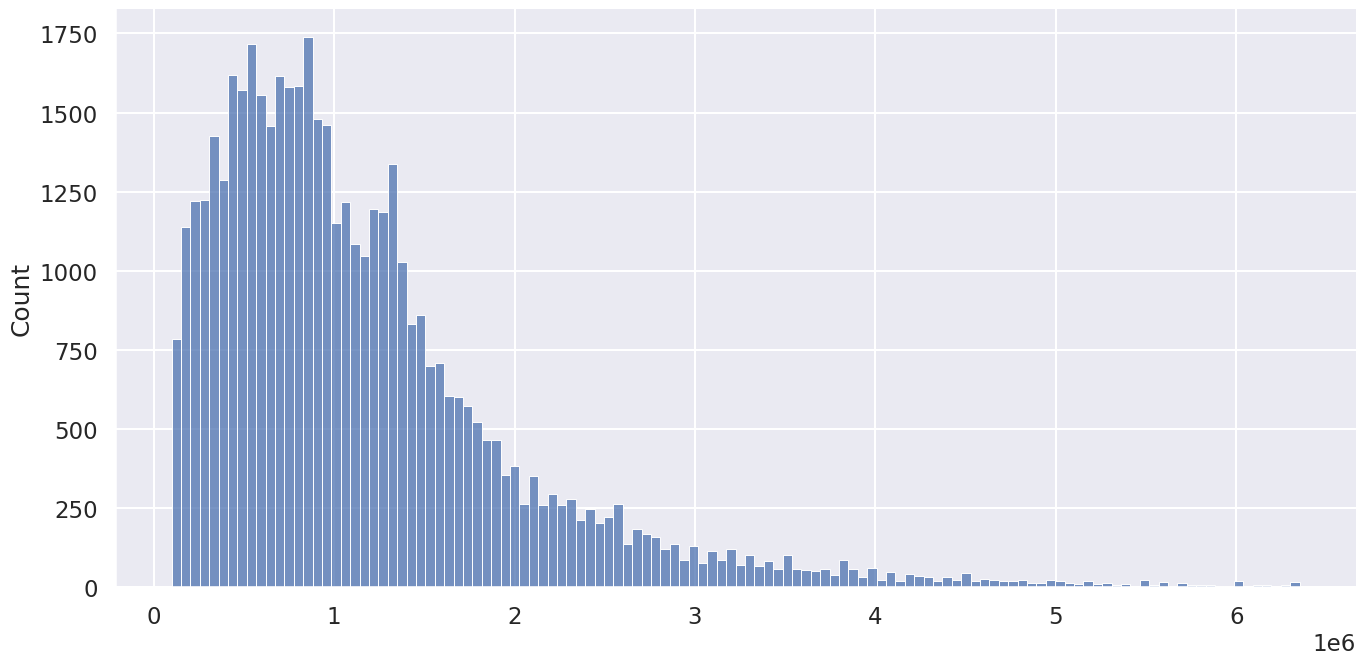

In [15]:
seaborn.set_theme('talk')
# seaborn.set_style('darkgrid')
# height - Высота (в дюймах) каждой грани
# aspect - Соотношение сторон каждой грани, так что пропорция * высота дает ширину каждой грани в дюймах.
seaborn.displot( data1['Sold Price'].dropna().values, height=7, aspect=2 )
plt.show()

### Дубликаты

In [16]:
print(f"число дубликатов { data1.duplicated().sum() }")
# .sum() - суммирует true(1) и false(0) значения

# дублирующиеся строки
data1[ data1.duplicated() ]

число дубликатов 0


Empty DataFrame
Columns: [Id, Address, Sold Price, Summary, Type, Year built, Heating, Cooling, Parking, Lot, Bedrooms, Bathrooms, Full bathrooms, Total interior livable area, Total spaces, Garage spaces, Region, Elementary School, Elementary School Score, Elementary School Distance, Middle School, Middle School Score, Middle School Distance, High School, High School Score, High School Distance, Flooring, Heating features, Cooling features, Appliances included, Laundry features, Parking features, Tax assessed value, Annual tax amount, Listed On, Listed Price, Last Sold On, Last Sold Price, City, Zip, State]
Index: []

[0 rows x 41 columns]

### Пропуски

In [17]:
# число пропусков в данных
data1.isna()  # -> таблица с True на месте пропущенного значения

Id  Address  Sold Price  Summary   Type  Year built  Heating  \
0      False    False       False    False  False       False    False   
1      False    False       False    False  False       False    False   
2      False    False       False    False  False       False    False   
3      False    False       False    False  False       False    False   
4      False    False       False    False  False        True     True   
...      ...      ...         ...      ...    ...         ...      ...   
47434  False    False       False    False  False       False    False   
47435  False    False       False    False  False       False    False   
47436  False    False       False    False  False       False    False   
47437  False    False       False    False  False       False    False   
47438  False    False       False    False  False       False     True   

       Cooling  Parking    Lot  ...  Parking features  Tax assessed value  \
0        False    False  False  ...             False               False   
1        False    False  False  ...             False               False   
2         True    False  False  ...              True               False   
3        False    False   True  ...             False               False   
4         True    False   True  ...              True                True   
...        ...      ...    ...  ...               ...                 ...   
47434    False    False  False  ...             False               False   
47435    False    False   True  ...             False               False   
47436    False    False  False  ...             False               False   
47437    False    False  False  ...             False               False   
47438    False    False  False  ...             False               False   

       Annual tax amount  Listed On  Listed Price  Last Sold On  \
0                  False      False         False          True   
1                  False      False         False         False   
2                  False      False         False          True   
3                  False      False         False         False   
4                   True      False         False         False   
...                  ...        ...           ...           ...   
47434              False      False         False          True   
47435              False      False         False          True   
47436              False      False         False         False   
47437              False      False         False         False   
47438              False      False         False          True   

       Last Sold Price   City    Zip  State  
0                 True  False  False  False  
1                False  False  False  False  
2                 True  False  False  False  
3                False  False  False  False  
4                False  False  False  False  
...                ...    ...    ...    ...  
47434             True  False  False  False  
47435             True  False  False  False  
47436            False  False  False  False  
47437            False  False  False  False  
47438             True  False  False  False  

[46928 rows x 41 columns]

In [18]:
data1.isna().sum(axis=0)  
# sum(axis=0)  -- суммирование пропусков (отметок True) с перебором строк (axis=0), т.е. вдоль столбцов

Id                                 0
Address                            0
Sold Price                         0
Summary                          342
Type                               0
Year built                      1025
Heating                         6408
Cooling                        10511
Parking                          902
Lot                            14096
Bedrooms                        2836
Bathrooms                       3417
Full bathrooms                  7789
Total interior livable area     2471
Total spaces                     903
Garage spaces                    904
Region                             2
Elementary School               4686
Elementary School Score         4840
Elementary School Distance      4686
Middle School                  16442
Middle School Score            16443
Middle School Distance         16442
High School                     4983
High School Score               5202
High School Distance            4984
Flooring                       11443
H

С пропусками можно бороться несколькими способами
1. Удалять все строки (объекты) где хотя бы в одном признаке есть пропуск
  - подойдёт, если данных много
2. Удалять признак (столбец), где много пропусков
3. Заполнить пропуски
  - подойдёт, если пропусков не много
  - можно заменять пропущенные значения на среднее, моду, медианы, по вероятности, алгоритмом учитывающим другие признаки объекта

<Axes: >

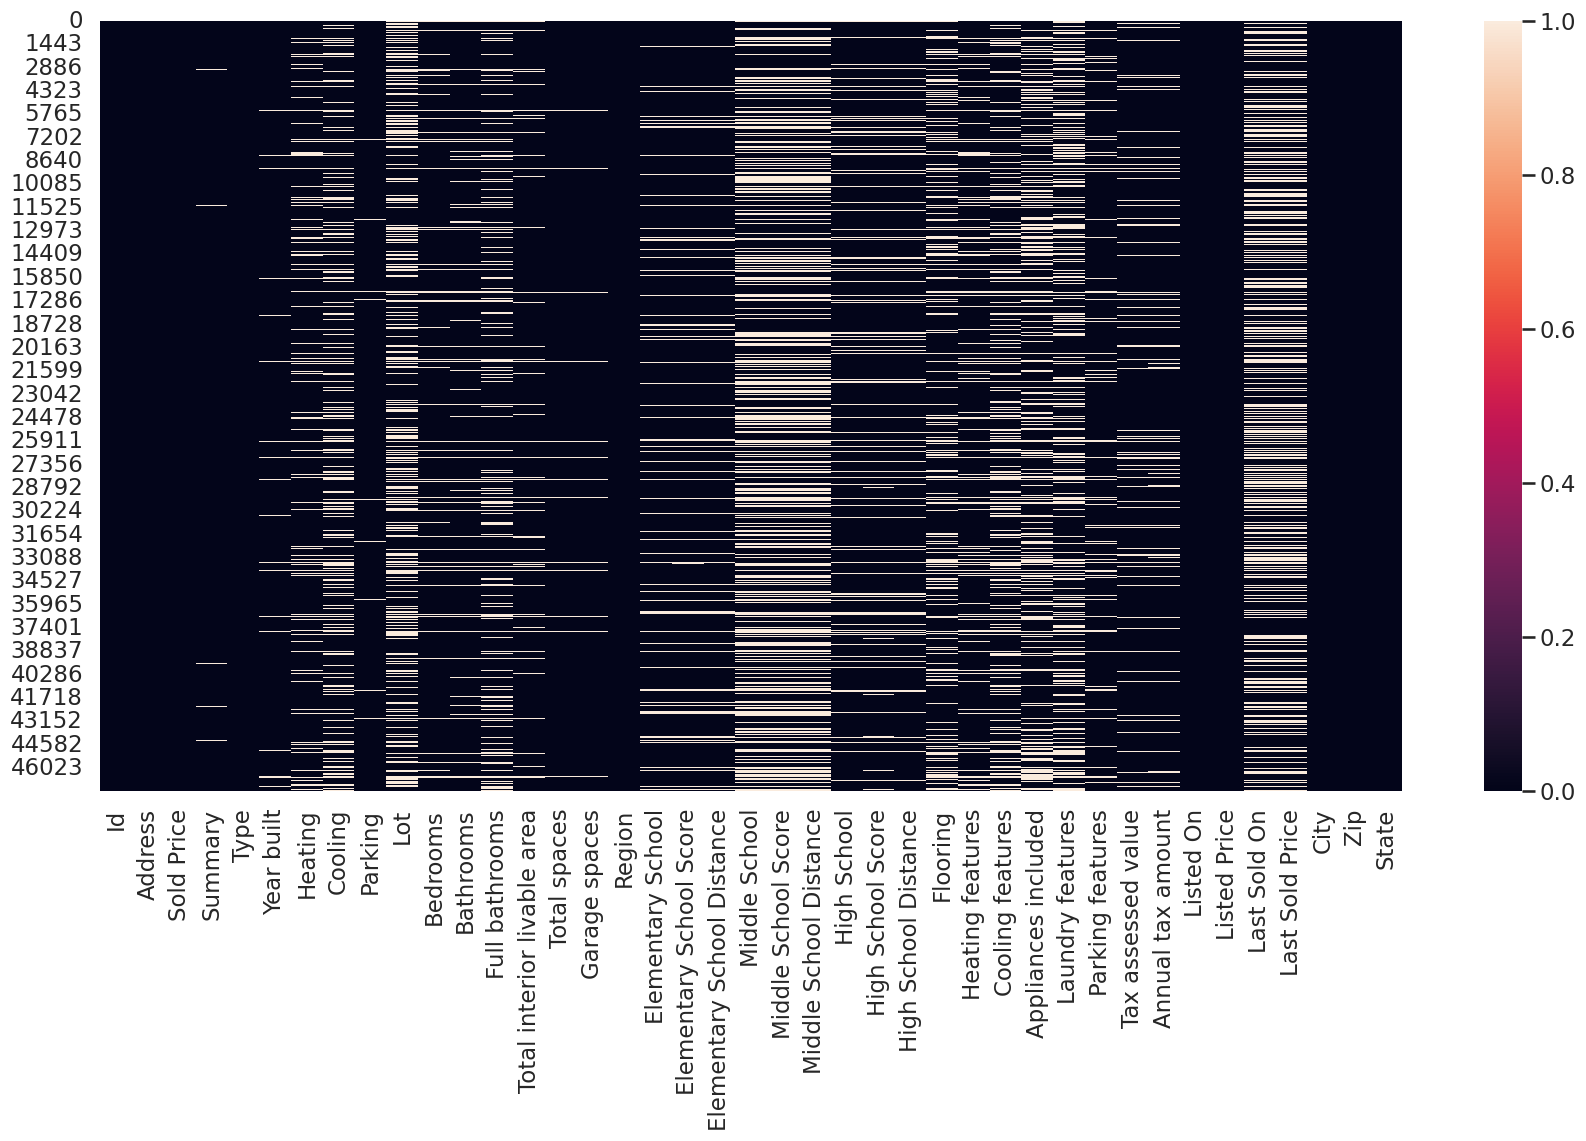

In [ ]:
# пропуски можно визуализировать
# построим из таблицы тепловую карту, где светлым отметим пропуски (True значения, которые вернёт data1.isna())
plt.figure( figsize=(21,10) )   # для удобства сделаем график большим
seaborn.heatmap( data1.isna() )

Для признаков Middle School, MS Score, MS Distance, Last Sold On, Last Sold Price слишком много пропусков. Удалим их.

При этом сохраним старую таблицу, записав данные в новую.

In [19]:
# data0.drop(..) удалит указанные столбцы и вернёт новый объект. в старом объекте данные не изменятся
data = data1.drop( columns=['Middle School', 'Middle School Score', 'Middle School Distance', 'Last Sold On', 'Last Sold Price', 'Lot', 'Cooling', 'Cooling features', 'Flooring', 'Appliances included', 'Laundry features'] )
data

Id                   Address  Sold Price  \
0          0               540 Pine Ln   3825000.0   
1          1            1727 W 67th St    505000.0   
2          2            28093 Pine Ave    140000.0   
3          3         10750 Braddock Dr   1775000.0   
4          4         7415 O Donovan Rd   1175000.0   
...      ...                       ...         ...   
47434  47434        2409 Florence Blvd    159000.0   
47435  47435  1085 Tasman Dr SPACE 818    255000.0   
47436  47436   1338 N Orange Grove Ave   2300000.0   
47437  47437         9996 Fan Shell Ln    500000.0   
47438  47438           4552 Howard Ave    760000.0   

                                                 Summary                Type  \
0      540 Pine Ln, Los Altos, CA 94022 is a single f...        SingleFamily   
1      HURRY, HURRY.......Great house 3 bed and 2 bat...        SingleFamily   
2      'THE PERFECT CABIN TO FLIP!  Strawberry deligh...        SingleFamily   
3      Rare 2-story Gated 5 bedroom Modern Mediterran...        SingleFamily   
4      Beautiful 200 acre ranch land with several pas...          VacantLand   
...                                                  ...                 ...   
47434  2409 Florence Blvd, Blythe, CA 92225 is a sing...        SingleFamily   
47435  LOOK AT THIS PRICE $30k PRICE REDUCTION, USE T...  MobileManufactured   
47436  Beautifully restored historic Colonial Revival...        SingleFamily   
47437  Great opportunity to live in the friendly gate...        SingleFamily   
47438  This fantastic single story home is on a large...        SingleFamily   

       Year built                                       Heating  \
0          1969.0  Heating - 2+ Zones, Central Forced Air - Gas   
1          1926.0                                   Combination   
2          1958.0                                    Forced air   
3          1947.0                                       Central   
4             NaN                                           NaN   
...           ...                                           ...   
47434      1965.0                                       Central   
47435      1999.0                       Central Forced Air, Gas   
47436      1919.0                                       Central   
47437      2017.0                                       Central   
47438      1948.0                                           NaN   

                                             Parking  \
0                 Garage, Garage - Attached, Covered   
1                           Detached Carport, Garage   
2                                           0 spaces   
3      Detached Carport, Driveway, Garage - Two Door   
4                                           0 spaces   
...                                              ...   
47434                               Carport, Covered   
47435                                        Carport   
47436                                       Driveway   
47437    Garage, Carport, Garage - Attached, Covered   
47438                              Garage - Attached   

                                                Bedrooms  Bathrooms  ...  \
0      Ground Floor Bedroom, Master Bedroom on Ground...        0.0  ...   
1                                                      3        2.0  ...   
2                                                      2        3.0  ...   
3                                                      5        3.0  ...   
4                                                    NaN        NaN  ...   
...                                                  ...        ...  ...   
47434                                                  3        2.0  ...   
47435                                                  3        2.0  ...   
47436                                                  3        2.0  ...   
47437                                                  3        3.0  ...   
47438                                                  2        1.0  ...   

       Hi

<Axes: >

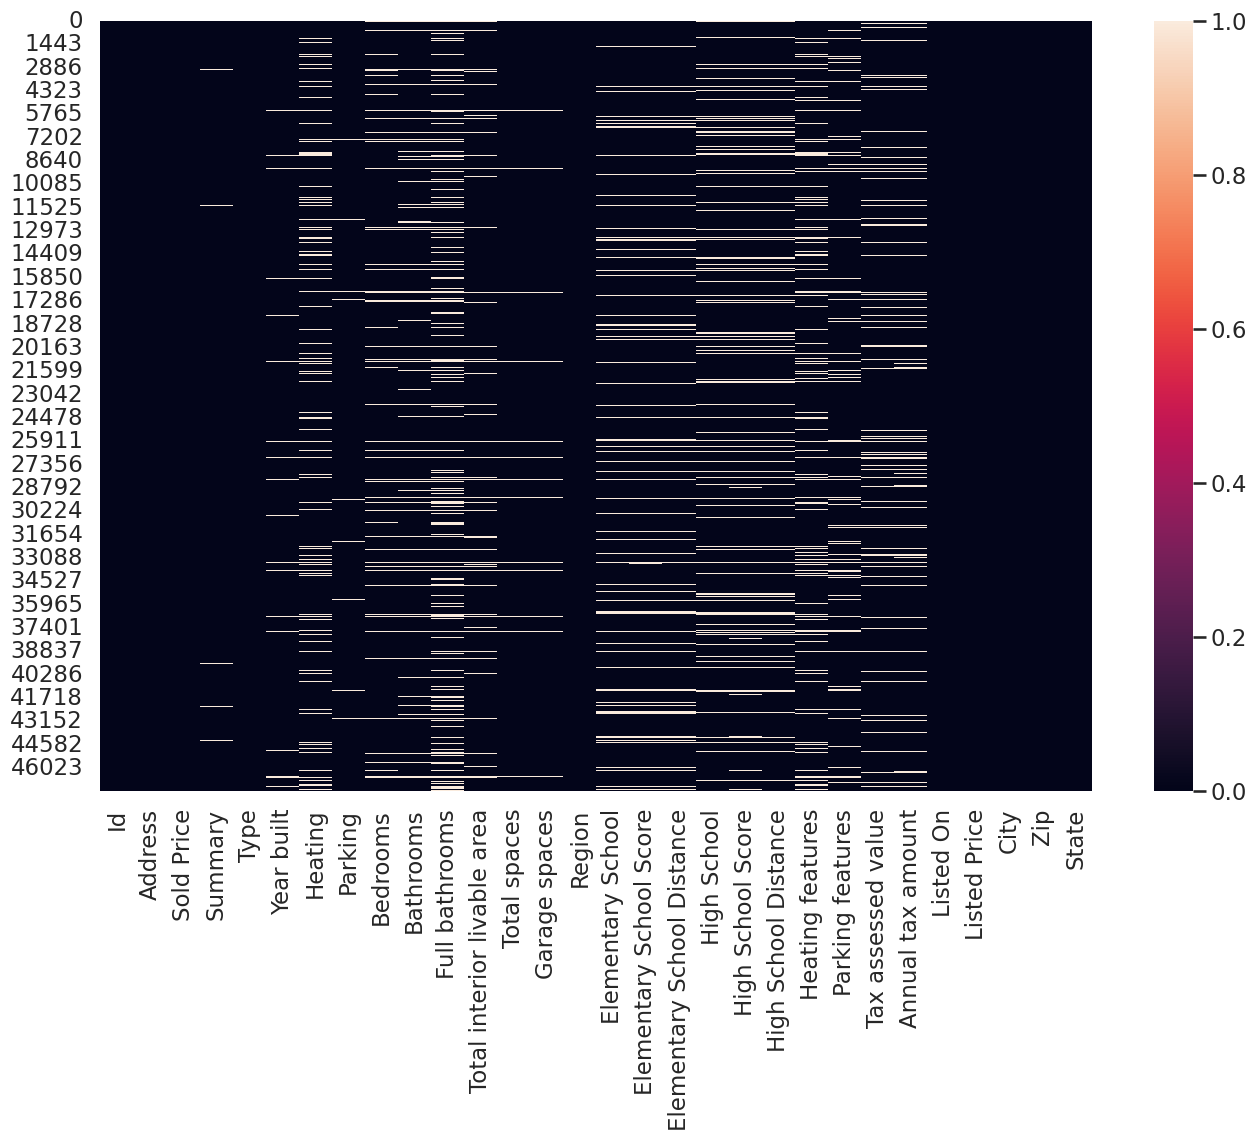

In [ ]:
# пропуски можно визуализировать
# построим из таблицы тепловую карту, где светлым отметим пропуски (True значения, которые вернёт data1.isna())
plt.figure( figsize=(16,10) )   # для удобства сделаем график большим
seaborn.heatmap( data.isna() )

In [20]:
len(data)

46928

In [21]:
# сформируем новый DataFrame, включая в него только необходимые столбцы
data = data[[ 'Sold Price',
              'Type',
              'Year built',
              'Parking',
              'Bedrooms',
              'Bathrooms',
              'Total spaces',
              'Garage spaces',
              'Total interior livable area',
              'Listed On',
              'Listed Price',
              'State',
              'Elementary School Score',
              'Elementary School Distance',
              'High School Score',
              'High School Distance',
              'Tax assessed value',
              'Annual tax amount',
              'Zip' ]]

# data.dropna() -- удалит все строки, где есть хотя бы один пропуск
data = data.dropna()
len(data)

32222

Так лучше, хоть и данных стало в разы меньше.

Проверим значения на гистограмме по нашему ключевому признаку.

<Axes: ylabel='Count'>

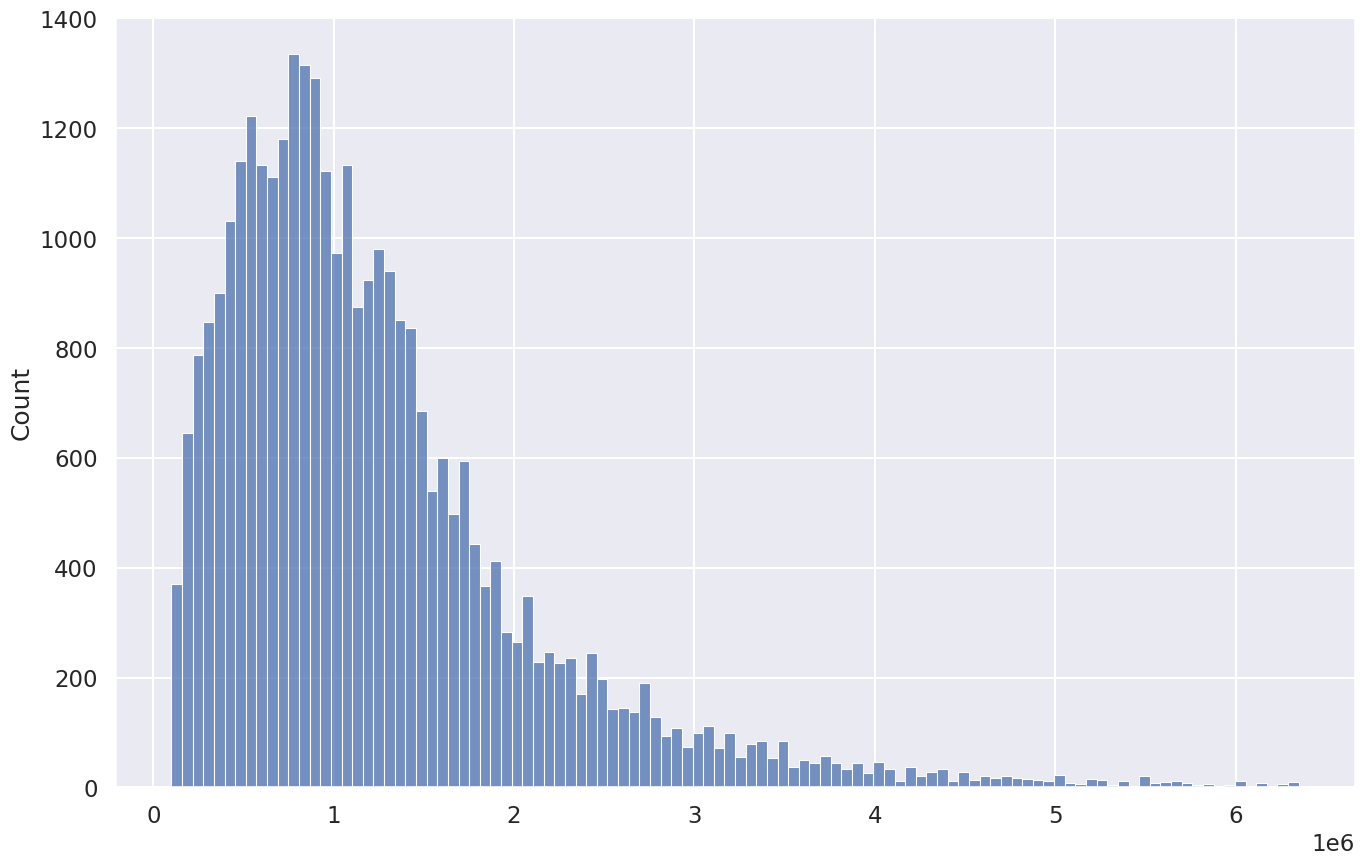

In [22]:
plt.figure( figsize=(16,10) )
seaborn.histplot( data['Sold Price'].values )

Всё ок!

### Выбросы

Проверим выбросы на данных по году постройки дома

<Axes: >

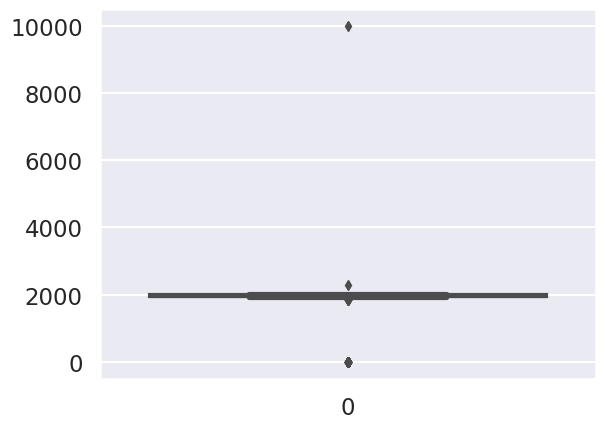

In [23]:
seaborn.boxplot(data['Year built'].values, linewidth=3)

Присутствует небольшое количество выбросов по году постройки дома, удалим их.

<Axes: ylabel='Count'>

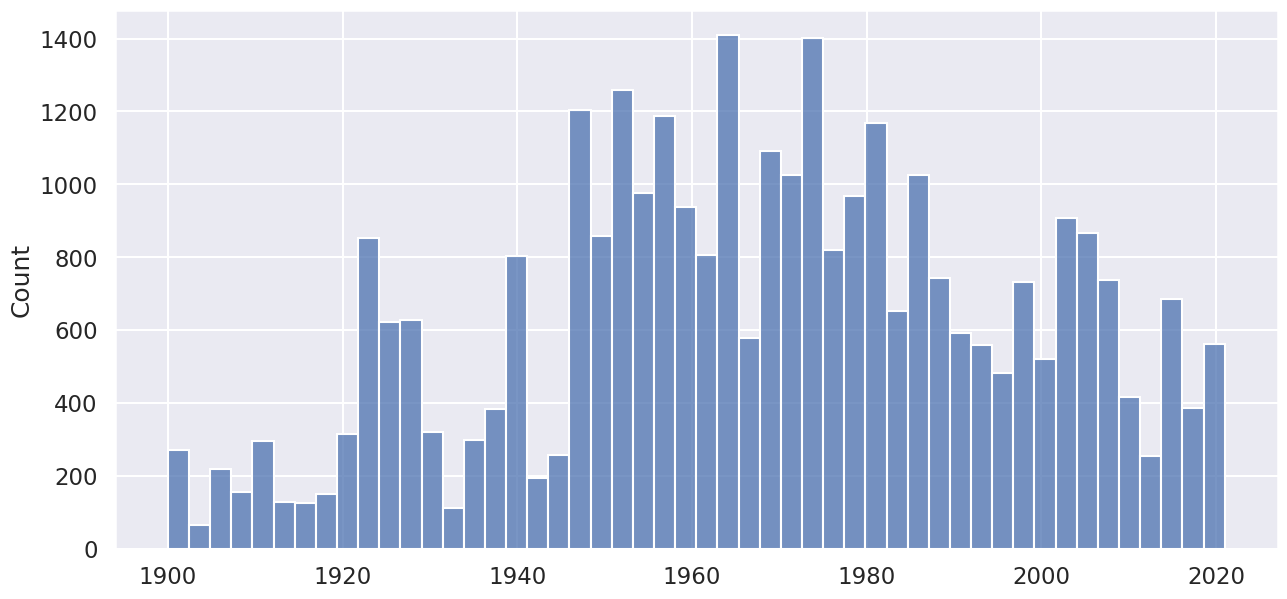

In [24]:
# используем критерий для отсечения выбросов: год постройки дома должен быть 
# в промежутке между 1900 и 2024
mask = ((data['Year built'] >= 1900)  & (data['Year built'] <= 2024))

data = data[mask] # маска с ограничением годов постройки

plt.figure( figsize=(15,7) )
seaborn.histplot(data['Year built'].values)

Проверим Listed Price и Sold Price

<Axes: >

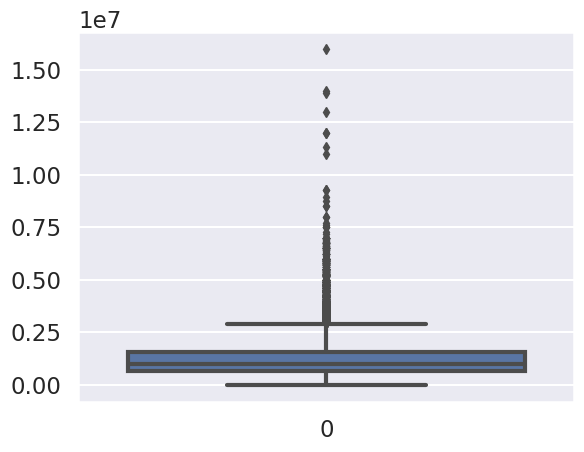

In [25]:
seaborn.boxplot(data['Listed Price'].values, linewidth=3)

Небольшая памятка по BoxPlot

![](https://thumb.tildacdn.com/tild3366-3466-4763-b165-386337353834/-/resize/824x/-/format/webp/Screenshot_1.png)

<Axes: >

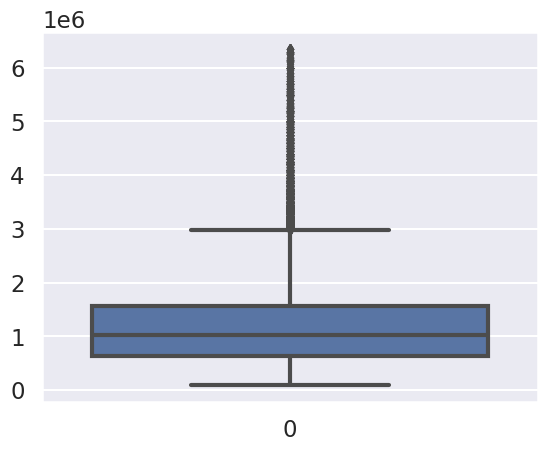

In [26]:
seaborn.boxplot(data['Sold Price'].values, linewidth=3)

На диаграммах размаха можно заметить **множество выбросов**.

У Sold Price и Listed Price это значения **свыше приблизительно трёх миллионов долларов**.

### Очистка от аномалий

In [27]:
data['Bedrooms']

0        Ground Floor Bedroom, Master Bedroom on Ground...
1                                                        3
3                                                        5
8                                                        4
9                                                        0
                               ...                        
47434                                                    3
47435                                                    3
47436                                                    3
47437                                                    3
47438                                                    2
Name: Bedrooms, Length: 31999, dtype: object

Видим, что столбец Bedrooms (рус. Спальни) содержит как числовые, так и строковые значения. Было бы хорошо это закодировать.

#### Кодирование нечисловых признаков

```
errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
```

- Если ‘raise’, то неверный разбор вызовет исключение. 
- Если ‘coerce’, то неверный разбор будет установлен как NaN. 
- Если ‘ignore’, то неверный разбор вернет ввод.

In [28]:
# в столбце Bedrooms заменим все нечисловые значения на 0
data['Bedrooms'] = pd.to_numeric(data['Bedrooms'], errors='coerce').fillna(0)

# и в последствии удалим эти строки
mask = (data['Bedrooms'] != 0)
data = data[mask]

# заменим полученные ранее нули на среднее
var_val = mean(data['Bedrooms'])
data['Bedrooms'] = data['Bedrooms'].replace(0, var_val)

data['Bedrooms']

<ipython-input-28-4def8e388b1f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bedrooms'] = data['Bedrooms'].replace(0, var_val)


1        3.0
3        5.0
8        4.0
10       4.0
11       3.0
        ... 
47434    3.0
47435    3.0
47436    3.0
47437    3.0
47438    2.0
Name: Bedrooms, Length: 25573, dtype: float64

LabelEncode -- заменяет каждую строку числом (в данном случае нет сортировки по важности признака)

Лучше использовать One-Hot кодирование.

In [ ]:
# снова сделаем копию данных
# в новую таблицу далее запишем уже кодированные варианты признаков
# data_enc = data.copy()
# types = pd.get_dummies(data_enc['Type'], prefix='Type')
# states = pd.get_dummies(data_enc['State'], prefix='State')

# data_enc = data_enc.join( types )
# data_enc = data_enc.join( states )
# data_enc.drop( columns=['Type', 'State'], inplace=True)
# data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25573 entries, 1 to 47438
Data columns (total 98 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Sold Price                                                            25573 non-null  float64
 1   Year built                                                            25573 non-null  float64
 2   Parking                                                               25573 non-null  object 
 3   Bedrooms                                                              25573 non-null  float64
 4   Bathrooms                                                             25573 non-null  float64
 5   Total spaces                                                          25573 non-null  float64
 6   Garage spaces                                                         25573 non-null  float64


In [29]:
# снова сделаем копию данных
# в новую таблицу далее запишем уже кодированные варианты признаков
data_enc = data.copy()

label_encode_type = LabelEncoder()
# fit_transform -- просмотр всех значений в столбце, 
#                  создание таблицы соответствия: не_числовое_значение_признака - числовой_код
#                  преобразование всех значений в числа
data_enc['type_small'] = data['Type'].apply( lambda s: s[:s.find(',')]) 
data_enc['type_small'] = label_encode_type.fit_transform( data_enc['type_small'] )
data_enc = data_enc.drop(columns='Type')

label_encode_state = LabelEncoder()
data_enc['State'] = label_encode_state.fit_transform( data['State'] )

label_encode_type.classes_

array(['1 Leve', '1 Level', '1 Stor', '2 House', '2 Level', '2 Stor',
       '2 Story', '2+ RESIDENCE', '3', '3 Stor', '3 Story', '4 Stor',
       'Apartmen', 'Attache', 'Cond', 'Cooperativ', 'Detached',
       'Double Wid', 'Duple', 'Flats', 'Ful', 'Full', 'Ground Floo',
       'Hi-Rise (9+', 'Hi-Rise (9+)', 'Junio', 'Leased Lan', 'Live/Wor',
       'Low-Rise (1-3', 'Luxur', 'Luxury', 'MFD-', 'Manufactured Hom',
       'Manufactured on Lan', 'Mid-Rise (4-8', 'Mid-Rise (4-8)',
       'Mobile Hom', 'MobileManufacture', 'MultiFamil',
       'New Construction', 'OTHE', 'One to Five Acre', 'Penthous', 'Ranc',
       'Recreationa', 'Residentia', 'Residential Lo', 'SINGLE',
       'Single Famil', 'SingleFamil', 'Split Leve', 'Top Floo',
       'Top Floor', 'Townhous', 'Unit Below', 'Unknow'], dtype=object)

In [30]:
data_enc

Sold Price  Year built  \
1        505000.0      1926.0   
3       1775000.0      1947.0   
8       1590000.0      2001.0   
10      1310000.0      1953.0   
11       810000.0      2002.0   
...           ...         ...   
47434    159000.0      1965.0   
47435    255000.0      1999.0   
47436   2300000.0      1919.0   
47437    500000.0      2017.0   
47438    760000.0      1948.0   

                                                 Parking  Bedrooms  Bathrooms  \
1                               Detached Carport, Garage       3.0        2.0   
3          Detached Carport, Driveway, Garage - Two Door       5.0        3.0   
8      Attached, Enclosed, Garage Door Opener, Interi...       4.0        3.0   
10                    Garage, Garage - Attached, Covered       4.0        2.0   
11                    Garage, Garage - Attached, Covered       3.0        2.0   
...                                                  ...       ...        ...   
47434                                   Carport, Covered       3.0        2.0   
47435                                            Carport       3.0        2.0   
47436                                           Driveway       3.0        2.0   
47437        Garage, Carport, Garage - Attached, Covered       3.0        3.0   
47438                                  Garage - Attached       2.0        1.0   

       Total spaces  Garage spaces  Total interior livable area   Listed On  \
1               1.0            1.0                        872.0  2019-10-16   
3               0.0            0.0                       2612.0  2019-10-24   
8               1.0            1.0                       1601.0  2019-07-18   
10              2.0            2.0                       1579.0  2019-09-20   
11              2.0            2.0                       1393.0  2019-09-05   
...             ...            ...                          ...         ...   
47434           2.0            2.0                       1432.0  2020-09-04   
47435           0.0            0.0                       1560.0  2020-07-23   
47436           0.0            0.0                       1860.0  2020-12-01   
47437           4.0            4.0                       2125.0  2020-08-01   
47438           1.0            1.0                       1112.0  2020-11-02   

       Listed Price  State  Elementary School Score  \
1          525000.0      1                      3.0   
3         1895000.0      1                      9.0   
8         1650000.0      1                      8.0   
10        1428000.0      1                      7.0   
11         849000.0      1                      4.0   
...             ...    ...                      ...   
47434      155000.0      1                      3.0   
47435      295900.0      1                      5.0   
47436     2295000.0      1                      7.0   
47437      499888.0      1                      7.0   
47438      748000.0      1                      9.0   

       Elementary School Distance  High School Score  High School Distance  \
1                             0.8                2.0                   1.3   
3                             0.2                8.0                   0.2   
8                             0.3                7.0                   0.5   
10                            0.4                6.0                   1.9   
11                            0.6                5.0                   0.2   
...                           ...                ...                   ...   
47434                         2.4                3.0                   1.8   
47435                         2.4                7.0                   2.5   
47436                         0.6                7.0                   0.8   
47437                         0.5                8.0                   1.2   
47438                         0.7                9.0                   1.3   

       Tax assessed value  Annual tax amount    Zip  type_small  
1                505000.

## Исследование данных и запросы в DataFrame

Выведем 4 столбца ('Type', 'Sold Price', 'Year built', 'Bedrooms') из data.

In [31]:
data[['Type', 'Sold Price', 'Year built', 'Bedrooms']]

Type  Sold Price  Year built  Bedrooms
1            SingleFamily    505000.0      1926.0       3.0
3            SingleFamily   1775000.0      1947.0       5.0
8                   Condo   1590000.0      2001.0       4.0
10           SingleFamily   1310000.0      1953.0       4.0
11              Townhouse    810000.0      2002.0       3.0
...                   ...         ...         ...       ...
47434        SingleFamily    159000.0      1965.0       3.0
47435  MobileManufactured    255000.0      1999.0       3.0
47436        SingleFamily   2300000.0      1919.0       3.0
47437        SingleFamily    500000.0      2017.0       3.0
47438        SingleFamily    760000.0      1948.0       2.0

[25573 rows x 4 columns]

In [ ]:
# показать дома со спальнями в количестве трех и более
data_with_2_or_more_bedrooms = data[data['Bedrooms'] >= 3]
data_with_2_or_more_bedrooms

Sold Price                Type  Year built  \
1        505000.0        SingleFamily      1926.0   
3       1775000.0        SingleFamily      1947.0   
8       1590000.0               Condo      2001.0   
10      1310000.0        SingleFamily      1953.0   
11       810000.0           Townhouse      2002.0   
...           ...                 ...         ...   
47432    450000.0        SingleFamily      1985.0   
47434    159000.0        SingleFamily      1965.0   
47435    255000.0  MobileManufactured      1999.0   
47436   2300000.0        SingleFamily      1919.0   
47437    500000.0        SingleFamily      2017.0   

                                                 Parking  Bedrooms  Bathrooms  \
1                               Detached Carport, Garage       3.0        2.0   
3          Detached Carport, Driveway, Garage - Two Door       5.0        3.0   
8      Attached, Enclosed, Garage Door Opener, Interi...       4.0        3.0   
10                    Garage, Garage - Attached, Covered       4.0        2.0   
11                    Garage, Garage - Attached, Covered       3.0        2.0   
...                                                  ...       ...        ...   
47432                                   Driveway, Garage       3.0        2.0   
47434                                   Carport, Covered       3.0        2.0   
47435                                            Carport       3.0        2.0   
47436                                           Driveway       3.0        2.0   
47437        Garage, Carport, Garage - Attached, Covered       3.0        3.0   

       Total spaces  Garage spaces  Total interior livable area   Listed On  \
1               1.0            1.0                        872.0  2019-10-16   
3               0.0            0.0                       2612.0  2019-10-24   
8               1.0            1.0                       1601.0  2019-07-18   
10              2.0            2.0                       1579.0  2019-09-20   
11              2.0            2.0                       1393.0  2019-09-05   
...             ...            ...                          ...         ...   
47432           3.0            3.0                       2122.0  2016-12-09   
47434           2.0            2.0                       1432.0  2020-09-04   
47435           0.0            0.0                       1560.0  2020-07-23   
47436           0.0            0.0                       1860.0  2020-12-01   
47437           4.0            4.0                       2125.0  2020-08-01   

       Listed Price State  Elementary School Score  \
1          525000.0    CA                      3.0   
3         1895000.0    CA                      9.0   
8         1650000.0    CA                      8.0   
10        1428000.0    CA                      7.0   
11         849000.0    CA                      4.0   
...             ...   ...                      ...   
47432      279999.0    CA                      4.0   
47434      155000.0    CA                      3.0   
47435      295900.0    CA                      5.0   
47436     2295000.0    CA                      7.0   
47437      499888.0    CA                      7.0   

       Elementary School Distance  High School Score  High School Distance  \
1                             0.8                2.0                   1.3   
3                             0.2                8.0                   0.2   
8                             0.3                7.0                   0.5   
10                            0.4                6.0                   1.9   
11                            0.6                5.0                   0.2   
...                           ...                ...                   ...   
47432                         6.3                5.0                   9.4   
47434                         2.4                3.0                   1.8   
47435                         2.4                7.0                   2.5   
47436              

In [ ]:
# показать дома с 1 спальней и ценой не более 500000
data_1_bedroom = data[ (data['Bedrooms'] == 1) & (data['Sold Price'] <= 500000) ]
data_1_bedroom

Sold Price          Type  Year built  \
52       420000.0         Condo      1965.0   
196      430000.0         Condo      1971.0   
197      212000.0  SingleFamily      1988.0   
222      450000.0         Condo      1973.0   
369      269000.0         Condo      2006.0   
...           ...           ...         ...   
47133    150000.0  SingleFamily      1900.0   
47244    435000.0  SingleFamily      1947.0   
47313    465000.0         Condo      1973.0   
47317    210000.0         Condo      2004.0   
47410    350000.0         Condo      1927.0   

                                                 Parking  Bedrooms  Bathrooms  \
52     Assigned, Built-In Storage, Community Structur...       1.0        1.0   
196                                               Garage       1.0        1.0   
197                                              Carport       1.0        1.0   
222                                             0 spaces       1.0        1.0   
369                                             0 spaces       1.0        1.0   
...                                                  ...       ...        ...   
47133                                           0 spaces       1.0        1.0   
47244             Driveway, Concrete, Gated, See Remarks       1.0        1.0   
47313                                           0 spaces       1.0        1.0   
47317                                           0 spaces       1.0        1.0   
47410                                               None       1.0        1.0   

       Total spaces  Garage spaces  Total interior livable area   Listed On  \
52              1.0            1.0                        724.0  2019-08-05   
196             2.0            2.0                        764.0  2015-03-25   
197             0.0            0.0                        500.0  2012-11-21   
222             0.0            0.0                        600.0  2013-05-25   
369             0.0            0.0                        698.0  2019-09-04   
...             ...            ...                          ...         ...   
47133           0.0            0.0                        872.0  2020-10-24   
47244           0.0            0.0                        648.0  2020-11-09   
47313           0.0            0.0                        748.0  2020-11-13   
47317           0.0            0.0                        641.0  2017-09-25   
47410           0.0            0.0                        539.0  2020-10-13   

       Listed Price State  Elementary School Score  \
52         428800.0    CA                      6.0   
196        291000.0    CA                      8.0   
197         60000.0    CA                      7.0   
222        329900.0    CA                      4.0   
369        280000.0    CA                      2.0   
...             ...   ...                      ...   
47133      220000.0    CA                      9.0   
47244      419000.0    CA                      4.0   
47313      469000.0    CA                      7.0   
47317      599000.0    CA                      7.0   
47410      350000.0    CA                      5.0   

       Elementary School Distance  High School Score  High School Distance  \
52                            0.5                4.0                   1.5   
196                           0.9                8.0                   1.9   
197                           0.3                6.0                   0.4   
222                           0.3                7.0                   0.7   
369                           0.2                3.0                   1.4   
...                           ...                ...                   ...   
47133                         0.3                7.0                  19.7   
47244                         0.2                3.0                   1.8   
47313                         0.2                6.0                   0.7   
47317                         2.6                6.0                   4.2   
47410        

In [ ]:
# числовые характеристики
data_1_bedroom.describe()

Sold Price   Year built  Bedrooms   Bathrooms  Total spaces  \
count     449.000000   449.000000     449.0  449.000000    449.000000   
mean   374768.200445  1972.623608       1.0    1.057906      0.723831   
std    108015.145195    21.898273       0.0    0.252198      0.923110   
min    105000.000000  1900.000000       1.0    0.000000      0.000000   
25%    307400.000000  1963.000000       1.0    1.000000      0.000000   
50%    410000.000000  1973.000000       1.0    1.000000      0.000000   
75%    462000.000000  1986.000000       1.0    1.000000      1.000000   
max    500000.000000  2018.000000       1.0    3.000000      5.000000   

       Garage spaces  Total interior livable area  Listed Price  \
count     449.000000                   449.000000  4.490000e+02   
mean        0.692650                   720.592428  4.000105e+05   
std         0.865491                   199.986118  1.649600e+05   
min         0.000000                   200.000000  0.000000e+00   
25%         0.000000                   622.000000  3.273790e+05   
50%         0.000000                   700.000000  4.190000e+05   
75%         1.000000                   798.000000  4.750000e+05   
max         5.000000                  2183.000000  2.300000e+06   

       Elementary School Score  Elementary School Distance  High School Score  \
count               449.000000                  449.000000         449.000000   
mean                  5.314031                    1.598886           5.668151   
std                   2.128003                    2.942025           1.907197   
min                   1.000000                    0.000000           2.000000   
25%                   4.000000                    0.300000           4.000000   
50%                   5.000000                    0.600000           6.000000   
75%                   7.000000                    1.000000           7.000000   
max                   9.000000                   23.000000          10.000000   

       High School Distance  Tax assessed value  Annual tax amount  \
count            449.000000        4.490000e+02         449.000000   
mean               3.058797        2.801547e+05        3627.129176   
std                4.542736        1.697610e+05        2147.512852   
min                0.000000        8.227000e+03          77.000000   
25%                0.800000        1.486970e+05        1994.000000   
50%                1.400000        2.747300e+05        3582.000000   
75%                2.500000        3.759140e+05        4882.000000   
max               30.100000        1.428000e+06       18232.000000   

                Zip  
count    449.000000  
mean   92610.200445  
std     2451.924913  
min    85624.000000  
25%    90057.000000  
50%    92386.000000  
75%    95110.000000  
max    96148.000000

## Визуализация

<Axes: xlabel='Year built', ylabel='Count'>

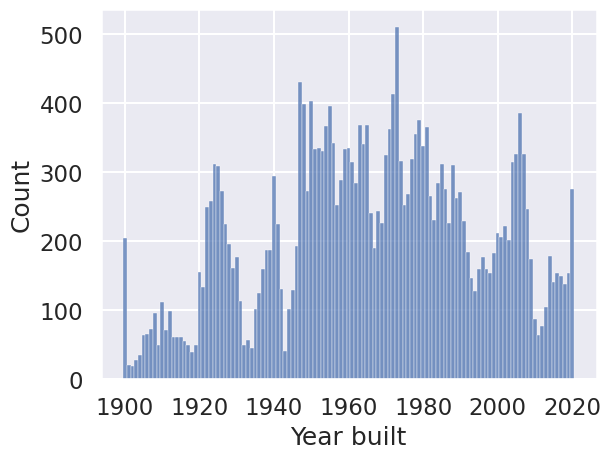

In [ ]:
# простая гистограмма по году постройки
seaborn.histplot( data['Year built'], discrete=True )

Видно, что в 1900 году довольно много было зданий построено относительно 1901 года, скорее всего люди просто не знали какой год указать и указывали 1900.

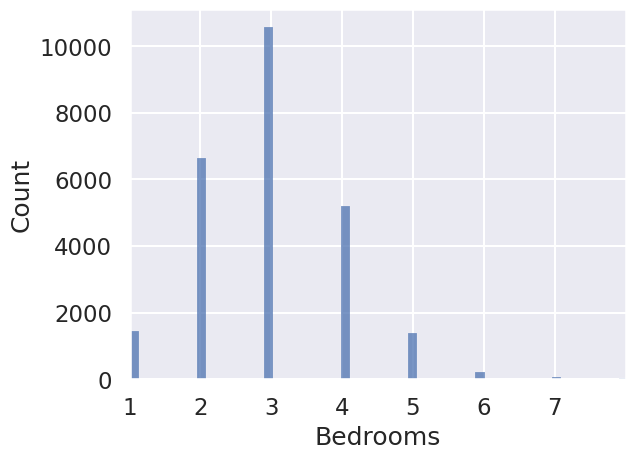

In [ ]:
# простая гистограмма по количеству комнат
fig, ax = plt.subplots()
seaborn.histplot(data['Bedrooms'], ax=ax)
ax.set_xlim(1, 8)
ax.set_xticks(range(1,8))
plt.show()

**Итого:**
1. Имеется большое количество домов, которые строились в промежутке между 1950 и 2000 годами
2. Имеется большое количество домов с 3 спальнями


### Диаграммы размаха

Построим диаграмму размаха Listed Price к Sold Price, подсветим дополнительно Bathrooms.

<Axes: xlabel='Listed Price', ylabel='Sold Price'>

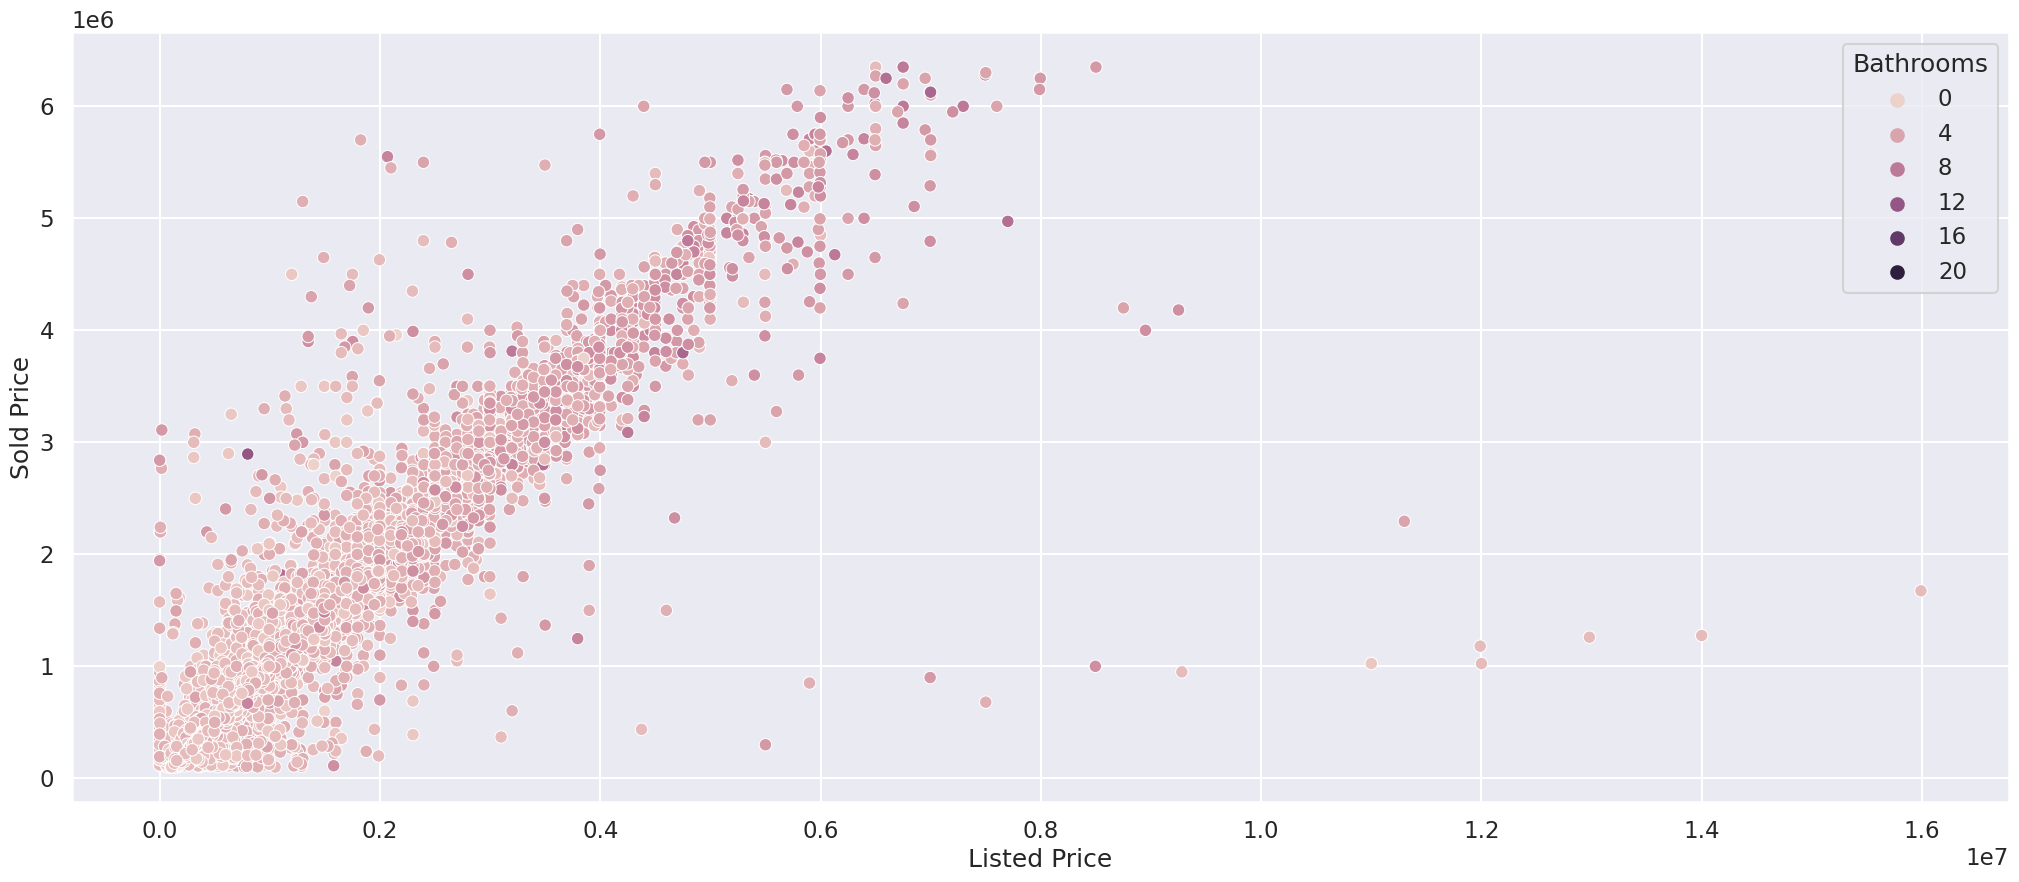

In [ ]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Listed Price', y ='Sold Price', hue='Bathrooms', data=data )

Видно, что Sold Price хорошо коррелирует с Listed Price, так как большинство значений сосредоточено в одной области и можно визуально провести прямую.

Проверим Sold Price с Total interior livable area.

<Axes: xlabel='Sold Price', ylabel='Total interior livable area'>

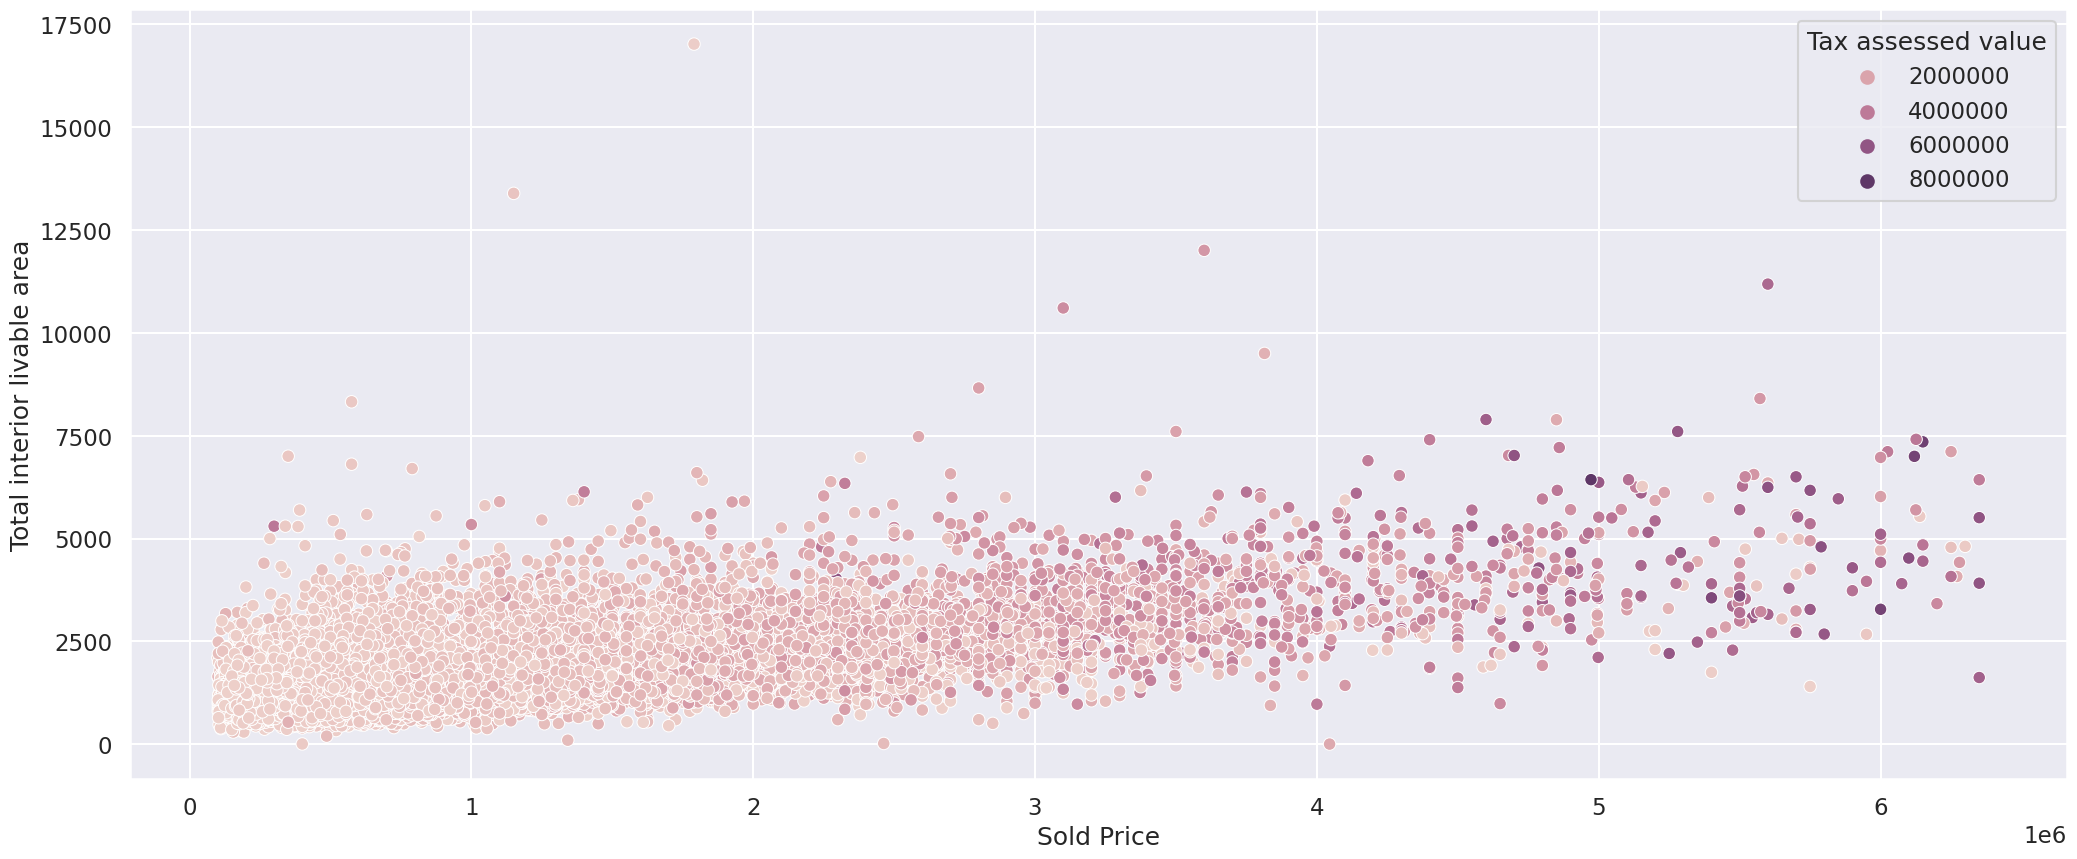

In [ ]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Sold Price', y ='Total interior livable area', hue='Tax assessed value', data=data )

Как видим, здесь ситуация точно такая же. Цена продажи хорошо коррелирует с размером жилой площади.

Проверим Tax assessed value.

<Axes: xlabel='Tax assessed value', ylabel='Sold Price'>

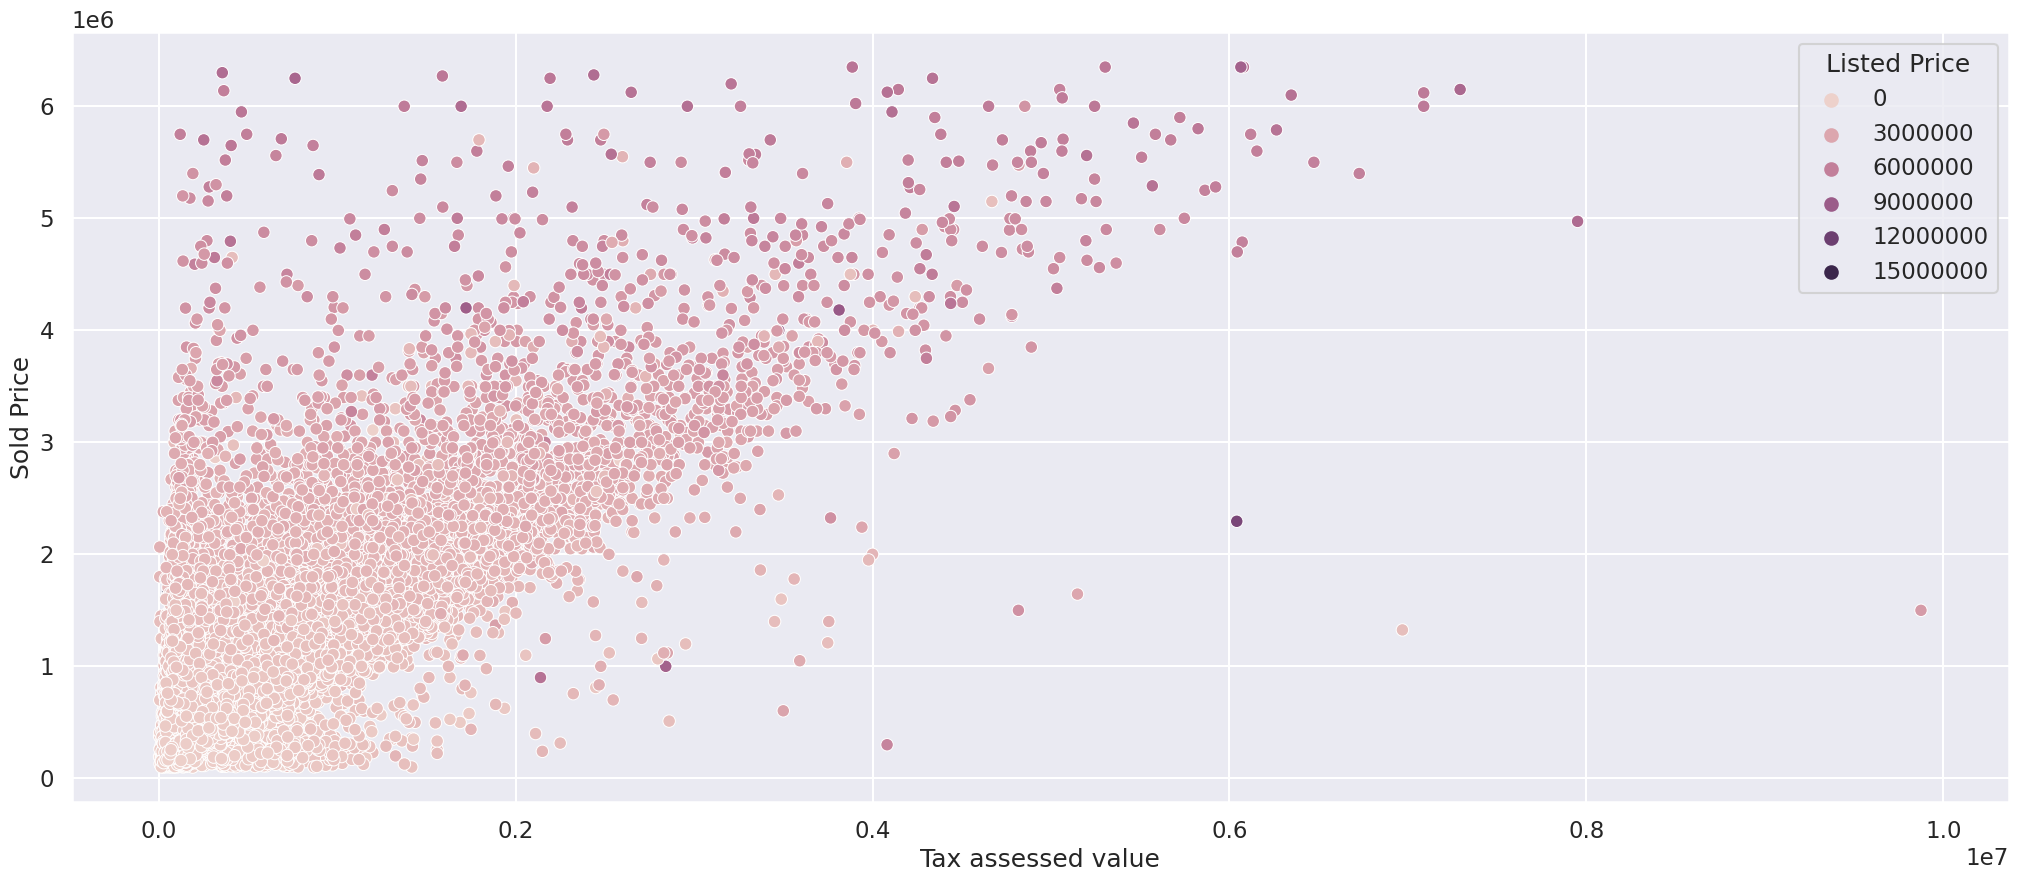

In [ ]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Tax assessed value', y ='Sold Price', hue='Listed Price', data=data ) 

Видим небольшой разброс по значениям, но в целом тоже можем провести прямую. 

### Попарные диаграммы рассеивания

Построим попарные диаграммы рассеивания, чтобы проверить и другие отношения.

Данная диаграмма позволяет установить зависимости для:

1. двух различных характеристик качества
2. двух факторов, влияющих на одну и ту же характеристику качества
3. характеристик качества процесса и фактора, влияющего на ход процесса

<Figure size 1000x500 with 0 Axes>

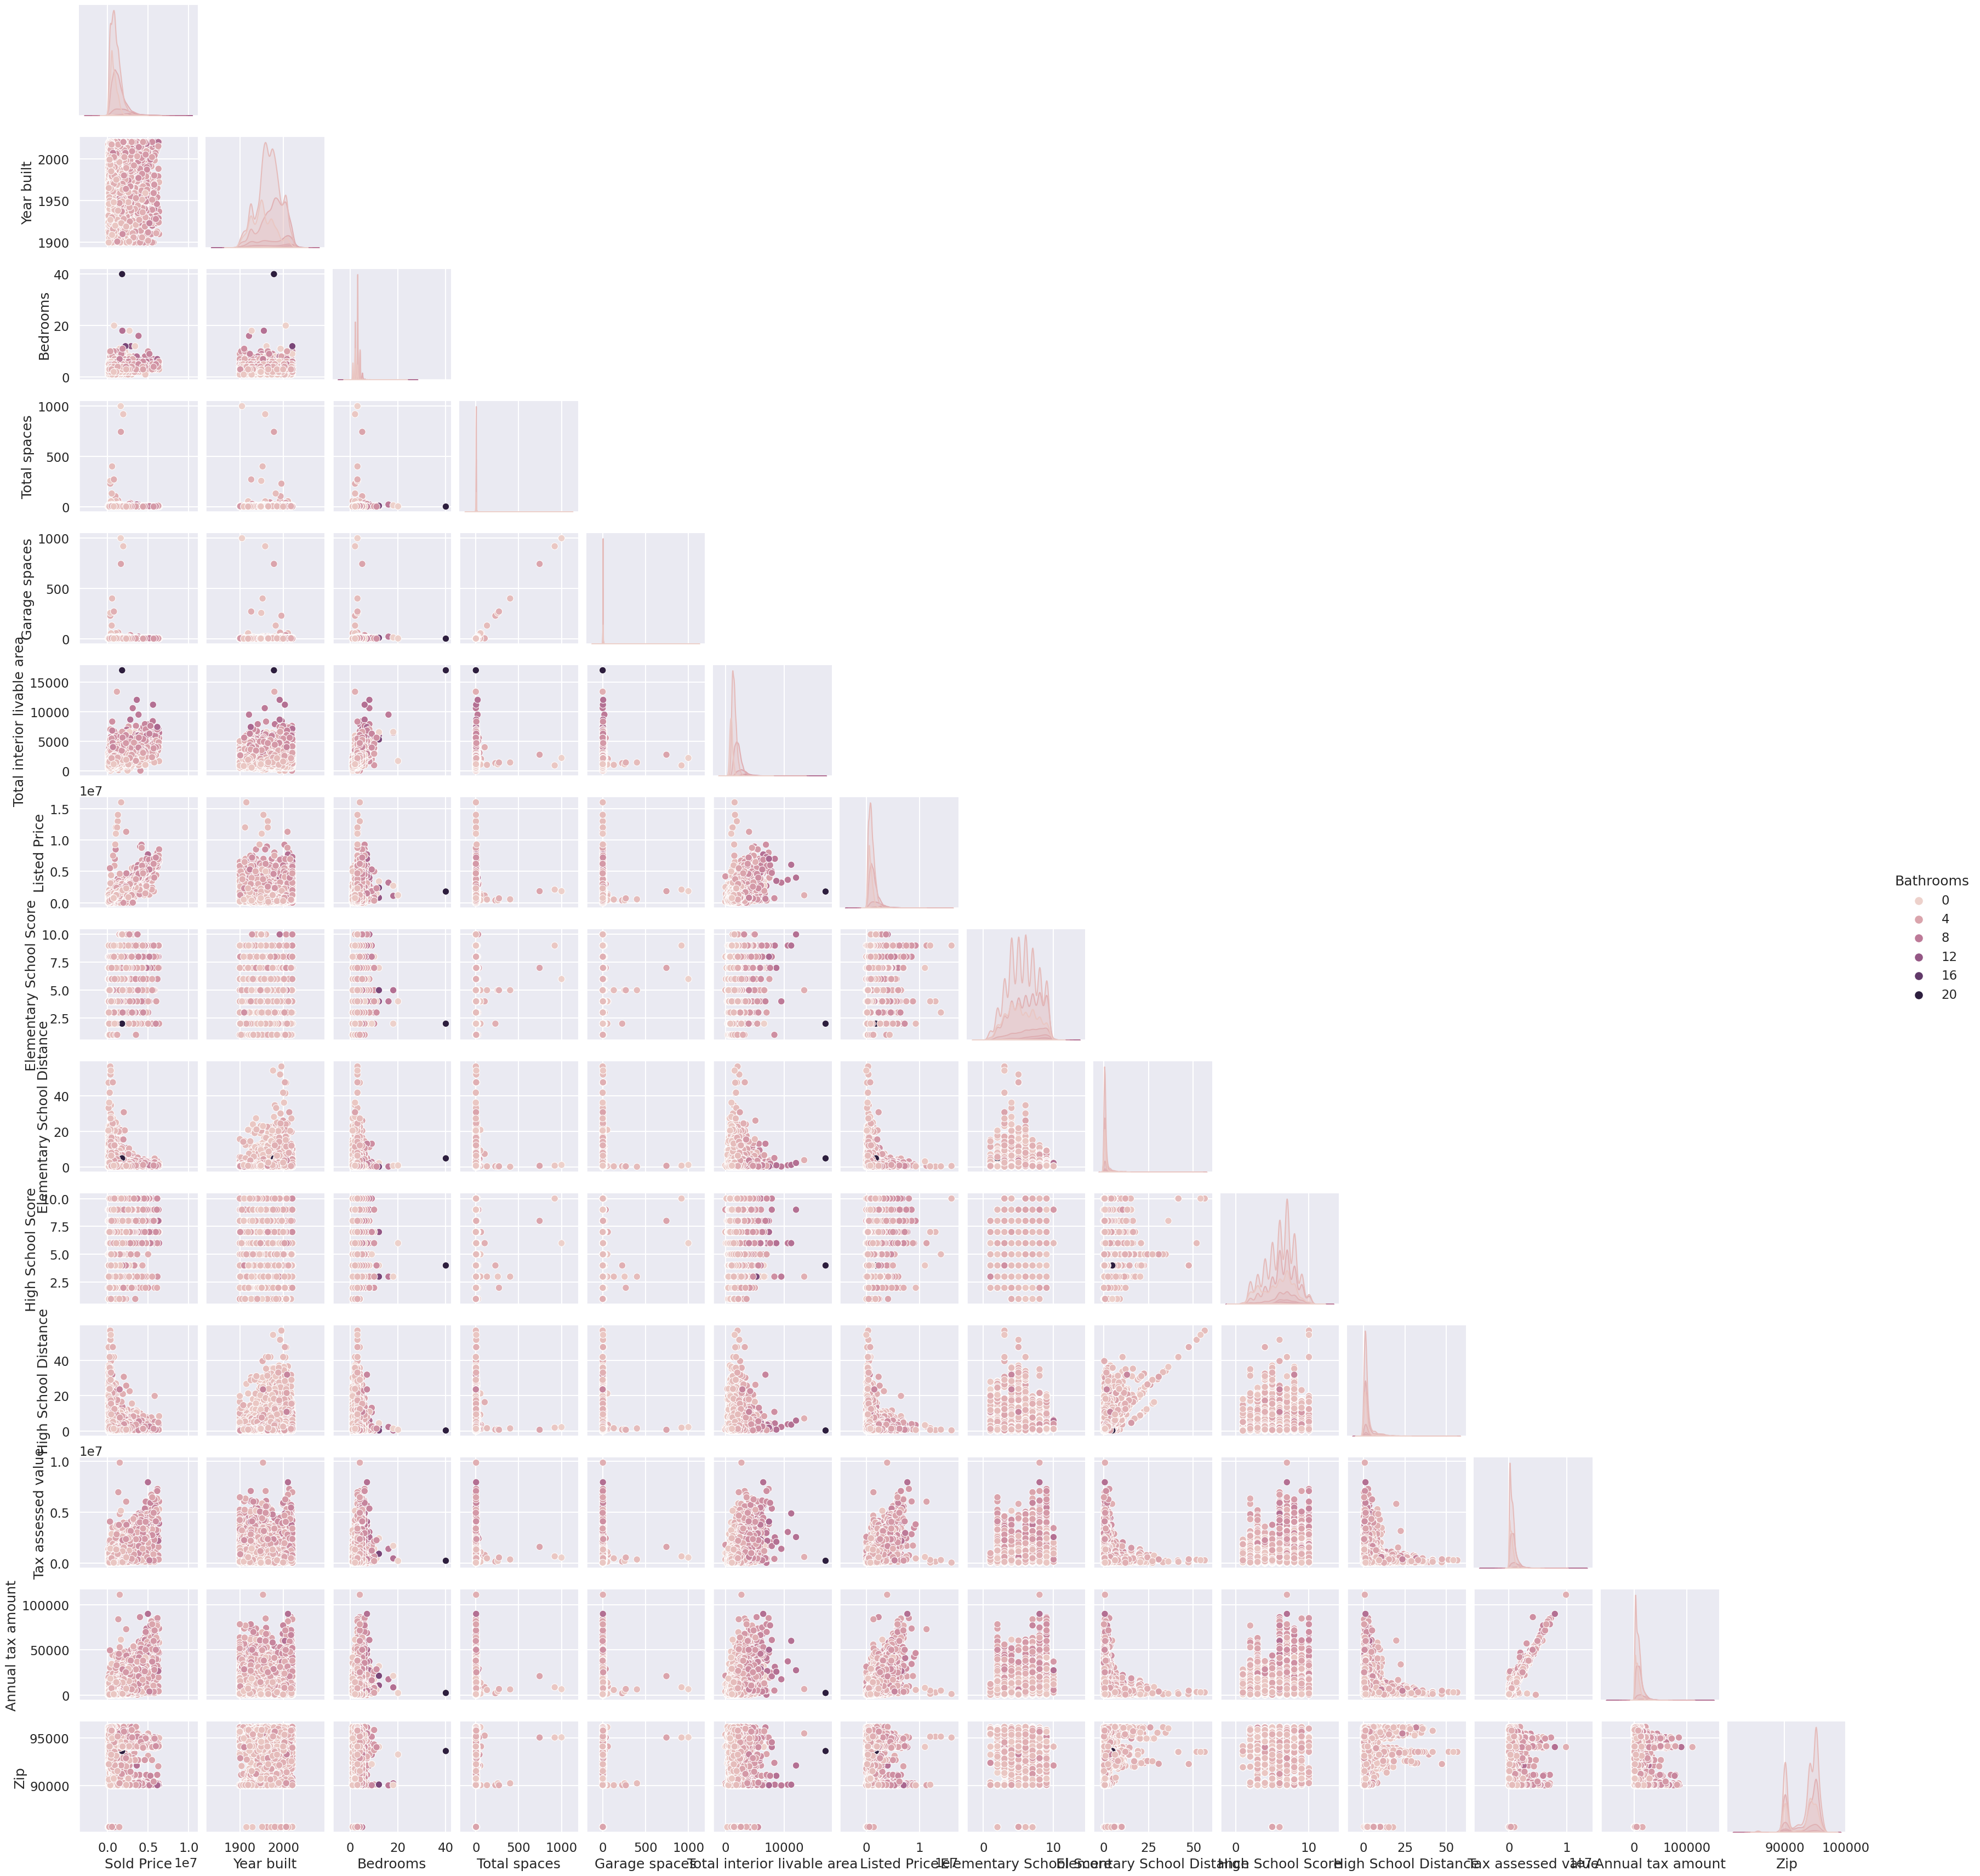

In [ ]:
plt.figure( figsize=(10,5) )
seaborn.pairplot(data=data, hue='Bathrooms', corner=True)
# corner=True -- построит только то, что ниже главной диагонали

### Матрица корреляции

**Коэффициент корреляции** – это статистическая мера, которая вычисляет силу связи между относительными движениями двух переменных. 

Значения коэффициента корреляции находятся в диапазоне от -1.0 до 1.0. 

Если вычисленное число больше 1.0 или меньше -1.0, то это свидетельствует о наличии погрешности в измерении корреляции. Это объясняется тем, что корреляция -1.0 показывает идеальную отрицательную корреляцию, в то время как корреляция 1.0 показывает идеальную положительную корреляцию. Корреляция 0.0 означает, что нет никакой связи между движением двух переменных.

<ipython-input-51-49dde9ab071e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap( data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

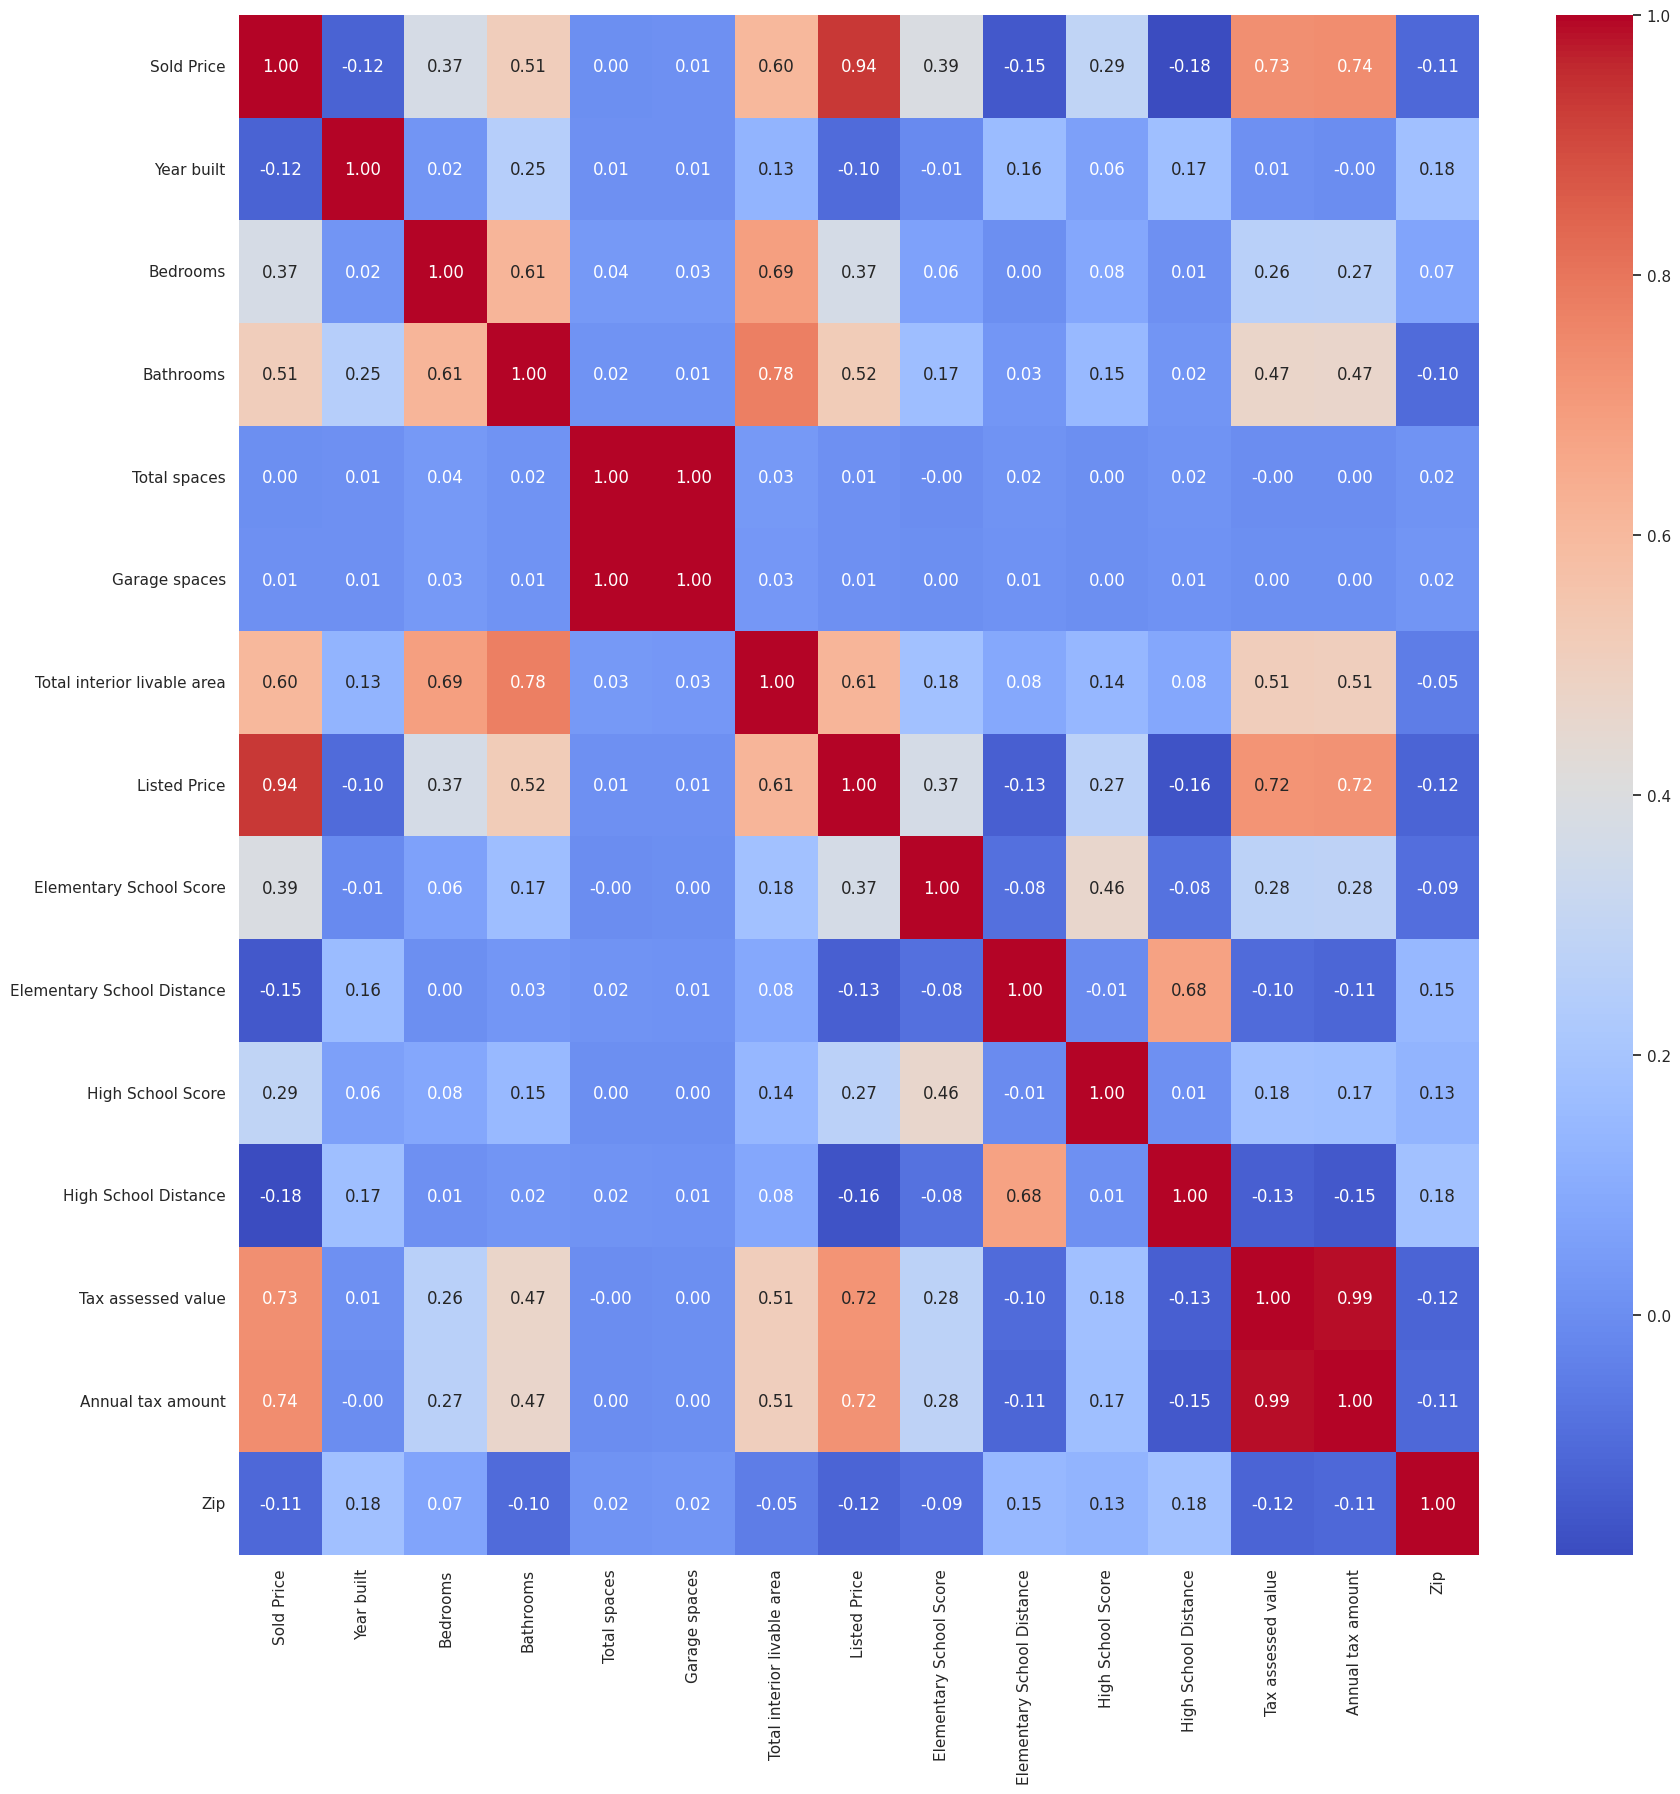

In [ ]:
seaborn.set_theme()

plt.figure( figsize=(20, 20) )

# annot=True -- показывать коэффициент корреляции
# cmap='coolwarm' -- цветовая схема
# fmt=".2f" -- формат вывода цифр
seaborn.heatmap( data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

По матрице видно, что `Sold Price` действительно сильно коррелирует с `Listed Price`, а также неплохо с `Tax assessed value` и `Annual tax amount`. 

`Listed Price` тоже хорошо коррелирует с `Tax assessed value` и `Annual tax amount`. 

`Total interior livable area` хорошо коррелирует с `Bathrooms`, а также с `Bedrooms` и `Sold Price`.

### Ящик с усами

Наши данные пока ещё не нормированные и находятся в разных по масштабу промежутках значений, поэтому следующие диаграммы выводятся по отдельности.



<Axes: >

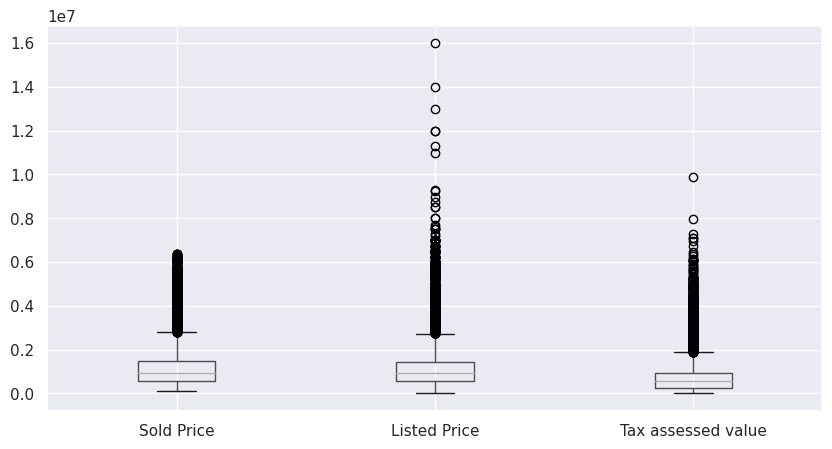

In [ ]:
data[['Sold Price', 'Listed Price', 'Tax assessed value']].boxplot(figsize=(10,5))

По каждому признаку видим выбросы, однако допустим, что они некритичны.

<Axes: >

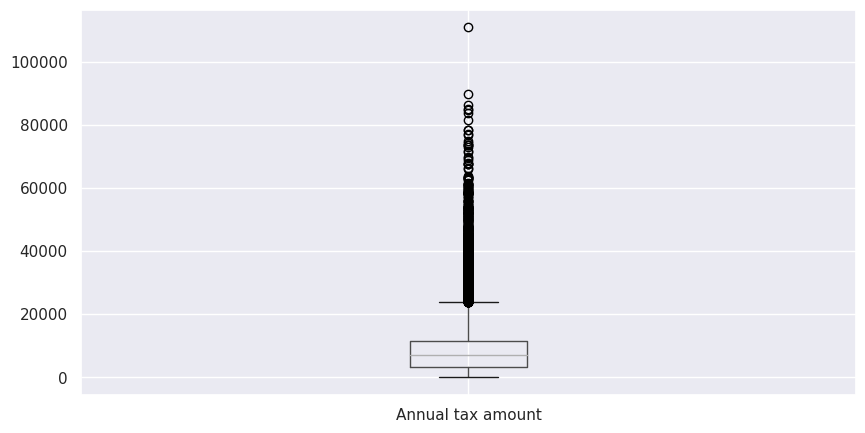

In [ ]:
data[['Annual tax amount']].boxplot(figsize=(10,5))

Выбросы по годовой сумме налога в принципе тоже не слишком критичны.

<Axes: >

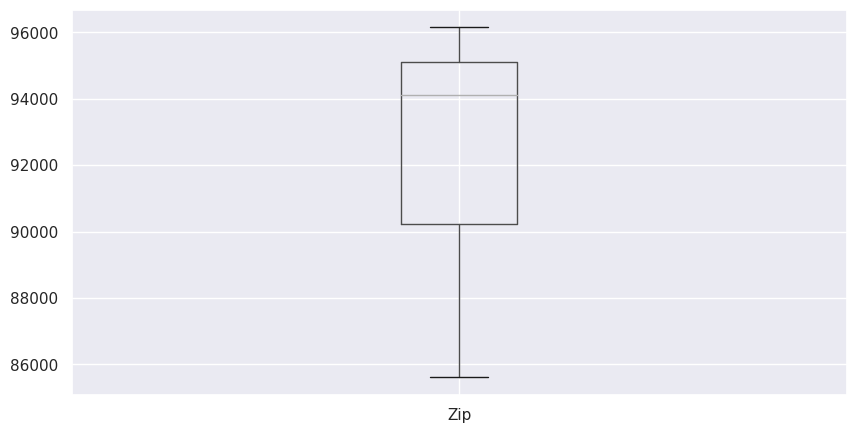

In [ ]:
data[['Zip']].boxplot(figsize=(10,5))

Почтовый индекс лежит в адекватных значениях и не имеет выбросов.

<Axes: >

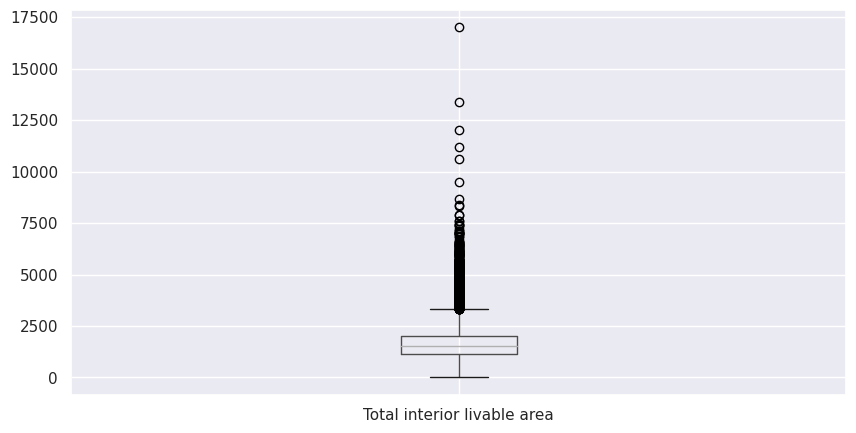

In [ ]:
data[['Total interior livable area']].boxplot(figsize=(10,5))

Общая внутренняя жилая площадь имеет некритичные выбросы.

<Axes: >

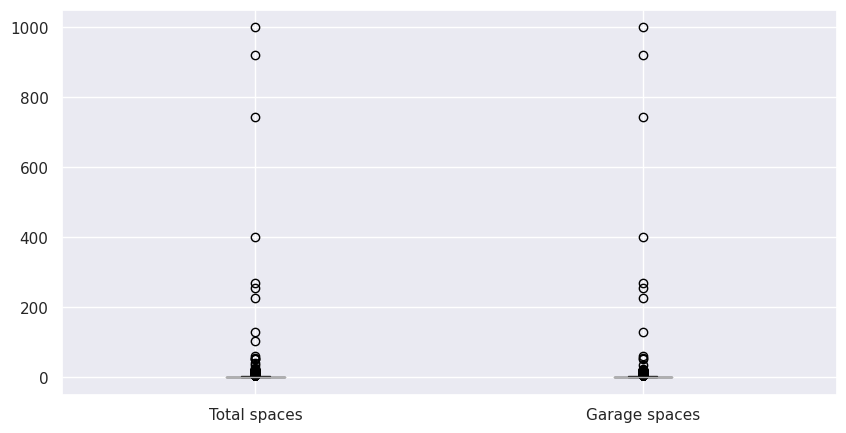

In [ ]:
data[['Total spaces', 'Garage spaces']].boxplot(figsize=(10,5))

Здесь уже наблюдаем нехорошие выбросы по признакам общего пространства и гаражного пространства. Хорошо бы было их почистить.

<Axes: >

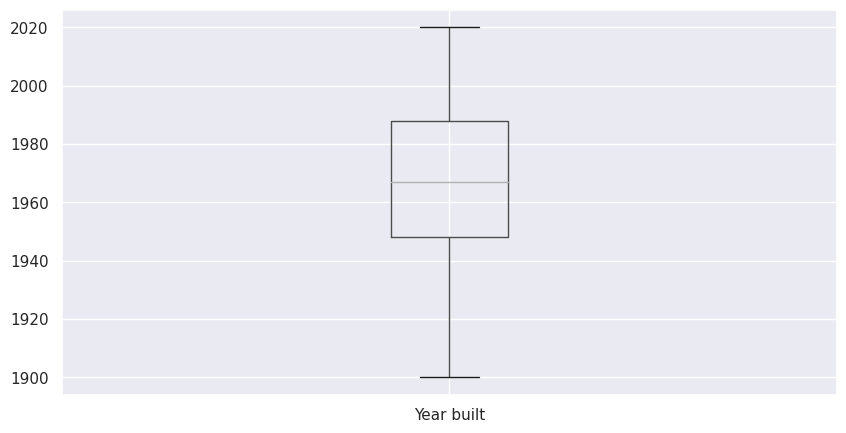

In [ ]:
data[['Year built']].boxplot(figsize=(10,5))

Год постройки мы ранее обработали, поэтому значения лежат в адекватном диапазоне.

Видно, что 50% домов были построены приблизительно с 1948 года по 1988.

<Axes: >

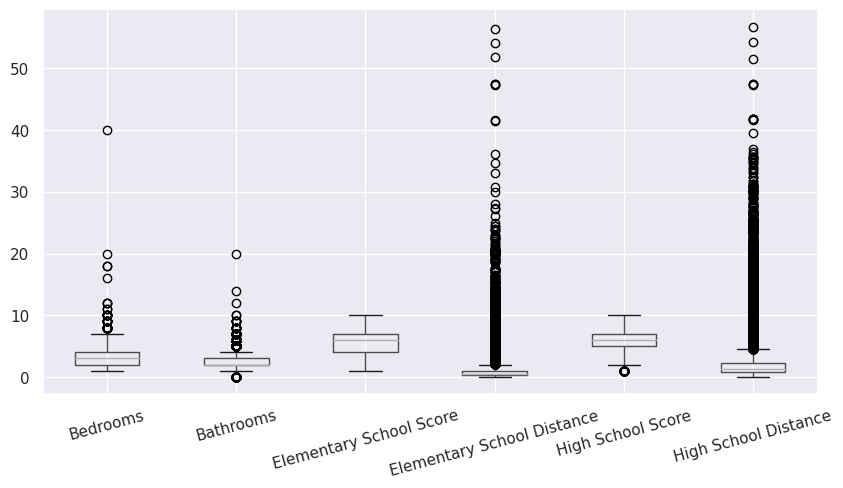

In [ ]:
data[['Bedrooms', 'Bathrooms', 'Elementary School Score', 'Elementary School Distance', 'High School Score', 'High School Distance']].boxplot(figsize=(10,5), rot=15)

Здесь видим большие выбросы по показателям Elementary School Distance и High School Distance.

Также видим, что в каком-то доме было аж 40 спальных комнат и в каком-то 20 ванных комнат. Скорее всего это некритичные выбросы.

# Подготовка данных

Подготовим данные к обучению.

Удалим для начала ненужные столбцы.

In [32]:
# удалим признаки нецелочисленного типа
data_new = data_enc.drop( columns=['Total spaces', 'Garage spaces', 'Parking', 'Listed On'] )
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25573 entries, 1 to 47438
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sold Price                   25573 non-null  float64
 1   Year built                   25573 non-null  float64
 2   Bedrooms                     25573 non-null  float64
 3   Bathrooms                    25573 non-null  float64
 4   Total interior livable area  25573 non-null  float64
 5   Listed Price                 25573 non-null  float64
 6   State                        25573 non-null  int64  
 7   Elementary School Score      25573 non-null  float64
 8   Elementary School Distance   25573 non-null  float64
 9   High School Score            25573 non-null  float64
 10  High School Distance         25573 non-null  float64
 11  Tax assessed value           25573 non-null  float64
 12  Annual tax amount            25573 non-null  float64
 13  Zip             

## Стандартизация

**Нормализация или стандартизация** -- приведенние разных признаков к одной шкале, с одним и тем же масштабом.

Нормализация нужна чтобы уравнять относительную значимость признаков перед применением моделей машинного обучения. 
Например в линейной регресии признаки с большим диапазоном значений, например 0-500 могут влиять на результат сильнее, чем признаки с диапазоном значений 1-80. Хотя важность признака должна определятся исследователем и моделью.

Нормализация vs стандартизация
- стандартизиция $ X' = \frac{X - \bar X} {\sigma_X} $
  - после стандартизации: $\bar{X'} = 0$, &nbsp; $\sigma_{X'} = 1$
  - отлично подходит для нормально распределённых признаков
  - преобразование слабо зависит от выбросов
- нормальзация $ X' = \frac{X-X_{min}}{X_{max} - X_{min}}$
    - после нормализации: $ X_{min}^{'} = 0$, &nbsp; $ X_{max}^{'} = 1$
    - полходяит когда распределение признака неизвестно
    - зависит от выбросов

In [33]:
# разделим на независимые признаки и целевую переменную
X = data_new.drop(columns='Sold Price')
y = data_new['Sold Price']

scaler = StandardScaler() # стандартизует по формуле (x - mean) / std

X = scaler.fit_transform(X)
X

array([[-1.40196554,  0.00808256, -0.29139578, ..., -0.33075113,
        -1.46232129,  0.49921871],
       [-0.67458326,  1.84537325,  0.68500154, ...,  1.43168156,
        -1.37952674,  0.49921871],
       [ 1.19582832,  0.9267279 ,  0.68500154, ...,  0.58356994,
         0.38087554, -1.97953844],
       ...,
       [-1.6444263 ,  0.00808256, -0.29139578, ..., -0.21458142,
        -1.46277372,  0.49921871],
       [ 1.75002434,  0.00808256,  0.68500154, ..., -0.16413612,
         1.12104982,  0.49921871],
       [-0.63994601, -0.91056279, -1.2677931 , ..., -0.95695193,
        -1.1578364 ,  0.49921871]])

In [34]:
y

1         505000.0
3        1775000.0
8        1590000.0
10       1310000.0
11        810000.0
           ...    
47434     159000.0
47435     255000.0
47436    2300000.0
47437     500000.0
47438     760000.0
Name: Sold Price, Length: 25573, dtype: float64

## Обучающая выборка и тестовая выборка

Разделим данные на обучающую и тестовую выборки.

Это делается для того, чтобы проверить, что наша модель действительно обучилась, а не просто запомнила ответы.

In [35]:
# разделим на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,      
                                                    random_state = 42,   # для одинаковых разбиений при каждом запуске
                                                    shuffle=True,        # перемешать данные перед разделением (вдруг данные упорядочены?)
                                                    )

print(f"test size:  {len(y_test):5d}")
print(f"train size: {len(y_train):5d}")

test size:   7672
train size: 17901


In [ ]:
# размерность массива
X_train.shape

(17901, 14)

In [ ]:
# размерность массива
X_test.shape

(7672, 14)

In [ ]:
y_train.shape

(17901,)

In [ ]:
y_test.shape

(7672,)

# Построение модели линейной регрессии

$$
f (x) = b + m⋅x,
$$

где $m$ — это наклон линии, 

а $b$ — ее сдвиг по оси $Y$.

Модели должны обучаться и тестироваться на разных данных. Иначе, легко переобучить модель под конкретные данные и узнать об этом только во время применения модели.


Две стратегии разделения на выборки:
- данных много. разделить их на тренировочную чать (80%) и тестовую (20%)
  - если модель обучается итеративно, то на каждой итерации можно считать метрика качества используя ~ 1/4 тестовой выборки -- валидационную выборку

- данных мало. Используйте кросс-валидацию

**R²** -- коэффициент детерминации, нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

**MAE** -- средняя абсолютная ошибка (англ. Mean Absolute Error).

**MSE** -- средняя квадратичная ошибка (англ. Mean Squared Error).

$$
MAE = \dfrac{1}{n}\sum \limits_{i=1}^{n}|a(x_i) - y_i|
$$

$$
MSE = \dfrac{1}{n}\sum \limits_{i=1}^{n}(a(x_i) - y_i)^2
$$

$$
R^2 = 1 - \dfrac{\sum \limits_{i=1}^{n}(a(x_i) - y_i)^2}{\sum \limits_{i=1}^{n}(y_i - \overline{y})^2}
$$

$\overline{y}$ -- среднее значение $y$

$y_i$ -- предсказанное значение $y$

In [36]:
regr = LinearRegression()

# для записи всех результатов R²
results = []
def write_result(model_name, y_test, y_pred):
  results.append([model_name, f"{r2_score(y_test, y_pred):.4f}"])

# построение уравнения линейной регресии
regr.fit(X_train, y_train)

# функция вывода коэффициента регресии
def print_report(type_str, y_pred, y_true):
    print(type_str)
    print( f"R² = {r2_score(y_true, y_pred):.4f}")
    print( f"MAE = {mean_absolute_error(y_true, y_pred):.4f}")
    print( f"MSE = {mean_squared_error(y_true, y_pred):.4f}")

# предскажем значения по тренировочной выборке
y_pred_train = regr.predict(X_train)
print_report("Train", y_pred_train, y_train)

Train
R² = 0.8961
MAE = 132061.6743
MSE = 75928298590.8787


In [37]:
# предскажем значения по тестовой выборке
y_pred_test = regr.predict(X_test)
print_report("Test", y_pred_test, y_test)
write_result('Linear Regression', y_test, y_pred_test)

Test
R² = 0.8767
MAE = 132342.7784
MSE = 90266867919.0529


## Тестируем на test.csv
Применим обученную модель на тестовых данных из задания

In [40]:
task_data = pd.read_csv('test.csv')
task_data.shape

(31626, 40)

Удалим столбцы, в которых было обнаружено много пропусков

In [41]:
task_data = task_data.drop( columns=['Middle School', 'Middle School Score', 'Middle School Distance', 'Last Sold On', 'Last Sold Price', 'Lot', 'Cooling', 'Cooling features', 'Flooring', 'Appliances included', 'Laundry features'] )

In [42]:
# сформируем новый DataFrame, включая в него только необходимые столбцы
task_data = task_data[[ 'Type',
                        'Year built',
                        'Parking',
                        'Bedrooms',
                        'Bathrooms',
                        'Total spaces',
                        'Garage spaces',
                        'Total interior livable area',
                        'Listed On',
                        'Listed Price',
                        'State',
                        'Elementary School Score',
                        'Elementary School Distance',
                        'High School Score',
                        'High School Distance',
                        'Tax assessed value',
                        'Annual tax amount',
                        'Zip' ]]

# data.dropna() -- удалит все строки, где есть хотя бы один пропуск
task_data = task_data.dropna()
len(task_data)

22247

In [43]:
# используем критерий для отсечения выбросов: год постройки дома должен быть 
# в промежутке между 1900 и 2024
mask = ((task_data['Year built'] >= 1900)  & (task_data['Year built'] <= 2024))

task_data = task_data[mask] # маска с ограничением годов постройки

In [44]:
# в столбце Bedrooms заменим все нечисловые значения на 0
task_data['Bedrooms'] = pd.to_numeric(task_data['Bedrooms'], errors='coerce').fillna(0)

# и в последствии удалим эти строки
mask = (task_data['Bedrooms'] != 0)
task_data = task_data[mask]

# заменим полученные ранее нули на среднее
var_val = mean(task_data['Bedrooms'])
task_data['Bedrooms'] = task_data['Bedrooms'].replace(0, var_val)

task_data['Bedrooms']

<ipython-input-44-8e482ee7ef02>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_data['Bedrooms'] = task_data['Bedrooms'].replace(0, var_val)


1        3.0
4        4.0
5        4.0
6        4.0
8        3.0
        ... 
31619    2.0
31620    3.0
31621    5.0
31624    3.0
31625    4.0
Name: Bedrooms, Length: 21496, dtype: float64

In [45]:
# снова сделаем копию данных
# в новую таблицу далее запишем уже кодированные варианты признаков
data_enc = task_data.copy()

label_encode_type = LabelEncoder()
# fit_transform -- просмотр всех значений в столбце, 
#                  создание таблицы соответствия: не_числовое_значение_признака - числовой_код
#                  преобразование всех значений в числа
data_enc['type_small'] = task_data['Type'].apply( lambda s: s[:s.find(',')]) 
data_enc['type_small'] = label_encode_type.fit_transform( data_enc['type_small'] )

label_encode_state = LabelEncoder()
data_enc['State'] = label_encode_state.fit_transform( task_data['State'] )

label_encode_type.classes_

array(['1 Leve', '1 Level', '3 Leve', '3 Stor', 'Apartmen', 'Attache',
       'Cond', 'Condominiu', 'Cooperativ', 'Detached', 'Duple',
       'Hi-Rise (9+', 'Luxury', 'MFD-', 'Manufactured Hom',
       'Manufactured on Lan', 'MobileManufacture', 'MultiFamil',
       'Planned Unit Developmen', 'Single Famil', 'SingleFamil',
       'Split Leve', 'Townhous', 'Unknow'], dtype=object)

In [46]:
# удалим признаки нецелочисленного типа
data_new = data_enc.drop( columns=['Type', 'Total spaces', 'Garage spaces', 'Parking', 'Listed On'] )
data_new

Year built  Bedrooms  Bathrooms  Total interior livable area  \
1          1924.0       3.0        2.0                       1729.0   
4          2017.0       4.0        3.0                       2377.0   
5          1962.0       4.0        2.0                       1430.0   
6          1973.0       4.0        3.0                       3441.0   
8          1929.0       3.0        3.0                       2424.0   
...           ...       ...        ...                          ...   
31619      1945.0       2.0        1.0                       1210.0   
31620      1978.0       3.0        3.0                       2040.0   
31621      2019.0       5.0        6.0                       5278.0   
31624      1984.0       3.0        3.0                       1428.0   
31625      1993.0       4.0        2.0                       1872.0   

       Listed Price  State  Elementary School Score  \
1          479950.0      1                      6.0   
4         1095000.0      1                      4.0   
5          748000.0      1                      7.0   
6         1499000.0      1                      8.0   
8         2149000.0      1                      7.0   
...             ...    ...                      ...   
31619      950000.0      1                      4.0   
31620      799500.0      1                      7.0   
31621     8500000.0      1                      5.0   
31624      445000.0      1                      7.0   
31625      559000.0      1                      7.0   

       Elementary School Distance  High School Score  High School Distance  \
1                             0.3                5.0                   1.2   
4                             1.0                5.0                   0.7   
5                             0.5                9.0                   0.8   
6                             2.1                8.0                   5.4   
8                             0.2                7.0                   0.9   
...                           ...                ...                   ...   
31619                         0.5                4.0                   0.6   
31620                         1.0                7.0                   6.9   
31621                         5.5                7.0                   5.3   
31624                         1.0                6.0                   1.7   
31625                         0.4                3.0                   0.4   

       Tax assessed value  Annual tax amount    Zip  type_small  
1                521977.0             7494.0  94577          20  
4                965282.0            12912.0  94545          20  
5                613727.0             7891.0  92845          20  
6               1121285.0            13644.0  90290          20  
8               1317902.0            16106.0  90048          20  
...                   ...                ...    ...         ...  
31619            538104.0             6853.0  94014          20  
31620            569800.0             7331.0  92103          20  
31621           4819317.0            53342.0  95991          20  
31624            334277.0             4032.0  92139          22  
31625            543150.0             7281.0  91706          22  

[21496 rows x 14 columns]

In [47]:
X = scaler.fit_transform(data_new) # стандартизует по формуле (x - mean) / std
X

array([[-2.07345189, -0.20309148, -0.4494634 , ...,  0.09452559,
         0.92727835,  0.40130998],
       [ 1.61407028,  0.77116751,  0.48929149, ...,  0.70585415,
         0.90869046,  0.40130998],
       [-0.5667224 ,  0.77116751, -0.4494634 , ...,  0.13932024,
        -0.07879151,  0.40130998],
       ...,
       [ 1.69337183,  1.7454265 ,  3.30555616, ...,  5.26768766,
         1.748631  ,  0.40130998],
       [ 0.30559467, -0.20309148,  0.48929149, ..., -0.29610186,
        -0.48888697,  0.80200483],
       [ 0.66245165,  0.77116751, -0.4494634 , ...,  0.07049218,
        -0.74040443,  0.80200483]])

In [48]:
# предскажем значения по тренировочной выборке
y_pred = regr.predict(X)
y_pred

array([1014684.9144521 , 1297075.80542218, 1179346.2984817 , ...,
       6268789.44417781,  888194.88999908,  964598.91357694])

In [49]:
X.shape

(21496, 14)

In [50]:
y_pred.shape

(21496,)

In [51]:
task_data['Pred Sold Price'] = y_pred
task_data

Type  Year built  \
1      SingleFamily      1924.0   
4      SingleFamily      2017.0   
5      SingleFamily      1962.0   
6      SingleFamily      1973.0   
8      SingleFamily      1929.0   
...             ...         ...   
31619  SingleFamily      1945.0   
31620  SingleFamily      1978.0   
31621  SingleFamily      2019.0   
31624     Townhouse      1984.0   
31625     Townhouse      1993.0   

                                                 Parking  Bedrooms  Bathrooms  \
1                                               Detached       3.0        2.0   
4                           Garage Door Opener, Attached       4.0        3.0   
5                                       Concrete, Garage       4.0        2.0   
6                                      Garage - Attached       4.0        3.0   
8                                                 Garage       3.0        3.0   
...                                                  ...       ...        ...   
31619                          Garage, Garage - Attached       2.0        1.0   
31620  Attached, Garage Door Opener, Insulated, Parki...       3.0        3.0   
31621  Attached, Detached, Garage Door Opener, Insula...       5.0        6.0   
31624                                           Assigned       3.0        3.0   
31625                  Garage Door Opener, Parking Space       4.0        2.0   

       Total spaces  Garage spaces  Total interior livable area   Listed On  \
1               2.0            2.0                       1729.0  2014-04-04   
4               2.0            2.0                       2377.0  2020-12-02   
5               2.0            2.0                       1430.0  2020-11-25   
6               2.0            2.0                       3441.0  2020-11-20   
8               2.0            2.0                       2424.0  2020-09-25   
...             ...            ...                          ...         ...   
31619           0.0            0.0                       1210.0  2021-01-22   
31620           0.0            2.0                       2040.0  2021-01-21   
31621           0.0            3.0                       5278.0  2020-10-28   
31624           2.0            2.0                       1428.0  2020-07-25   
31625           9.0            2.0                       1872.0  2018-05-08   

       Listed Price State  Elementary School Score  \
1          479950.0    CA                      6.0   
4         1095000.0    CA                      4.0   
5          748000.0    CA                      7.0   
6         1499000.0    CA                      8.0   
8         2149000.0    CA                      7.0   
...             ...   ...                      ...   
31619      950000.0    CA                      4.0   
31620      799500.0    CA                      7.0   
31621     8500000.0    CA                      5.0   
31624      445000.0    CA                      7.0   
31625      559000.0    CA                      7.0   

       Elementary School Distance  High School Score  High School Distance  \
1                             0.3                5.0                   1.2   
4                             1.0                5.0                   0.7   
5                             0.5                9.0                   0.8   
6                             2.1                8.0                   5.4   
8                             0.2                7.0                   0.9   
...                           ...                ...                   ...   
31619                         0.5                4.0                   0.6   
31620                         1.0                7.0                   6.9   
31621                         5.5                7.0                   5.3   
31624                         1.0                6.0                   1.7   
31625                         0.4                3.0                   0.4   

       Tax assessed value  Annual tax amount    Zip  Pred Sold Price  
1              

<Axes: xlabel='Listed Price', ylabel='Pred Sold Price'>

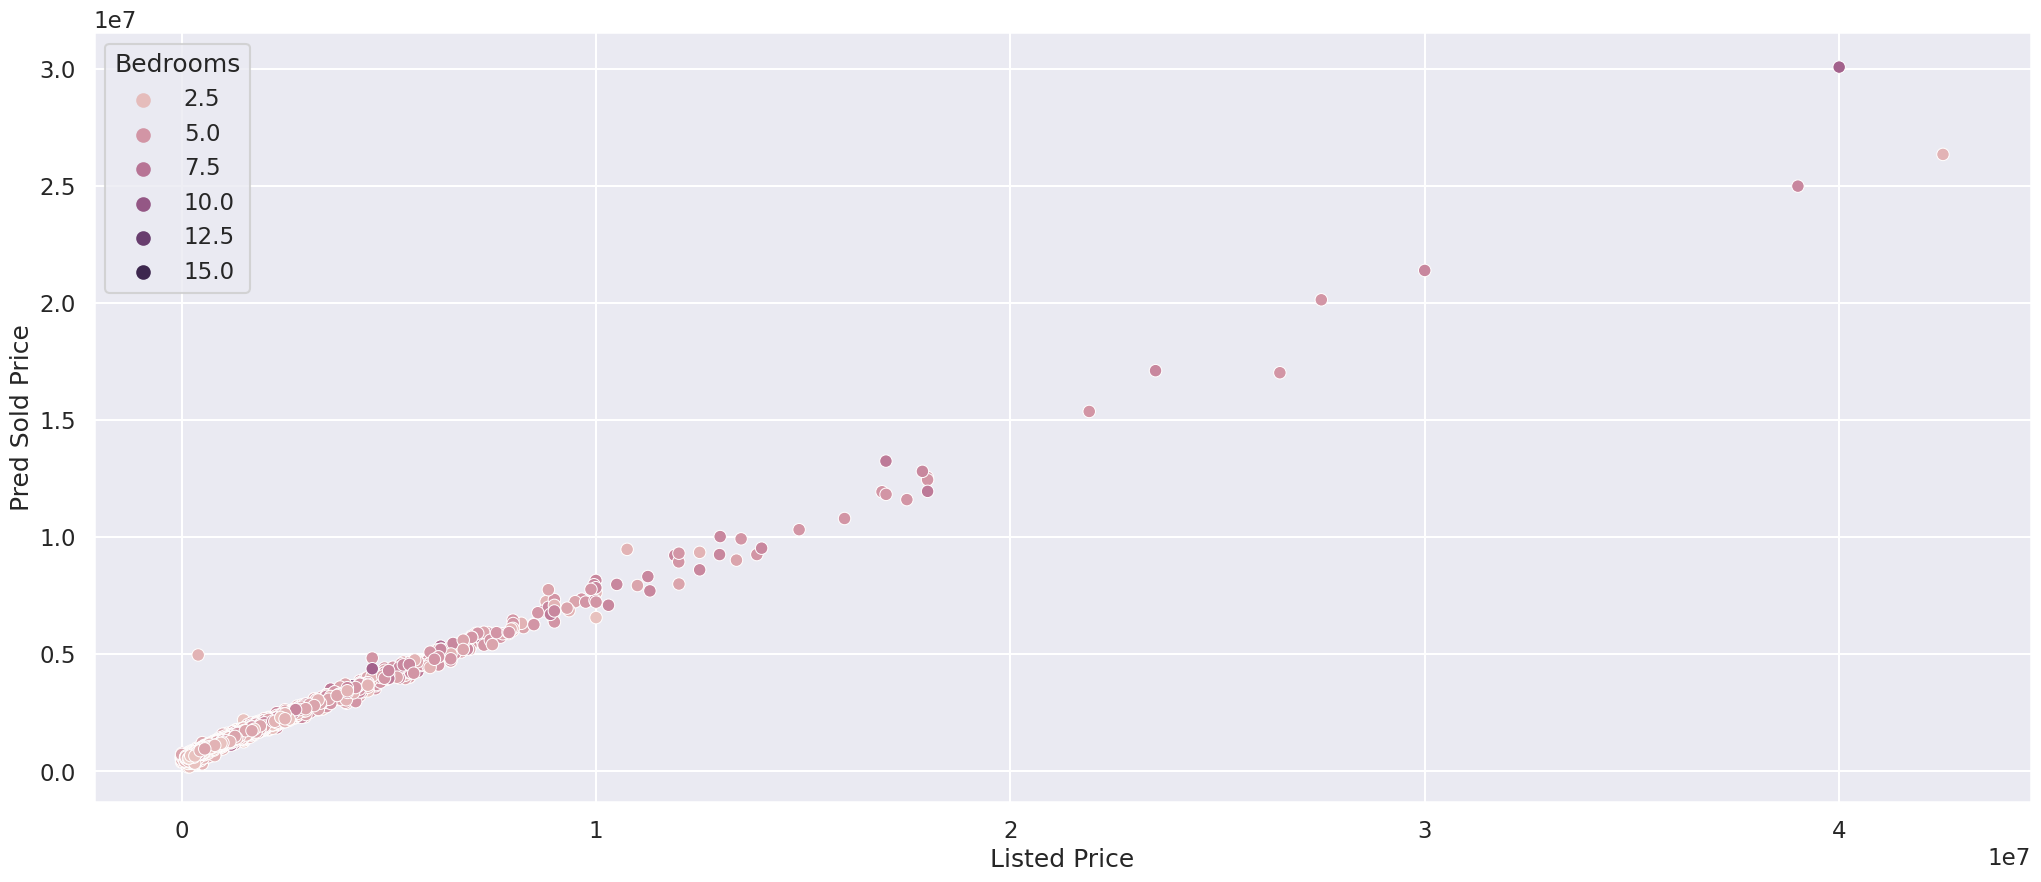

In [52]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Listed Price', y ='Pred Sold Price', hue='Bedrooms', data=task_data )

<Axes: xlabel='Pred Sold Price', ylabel='Total interior livable area'>

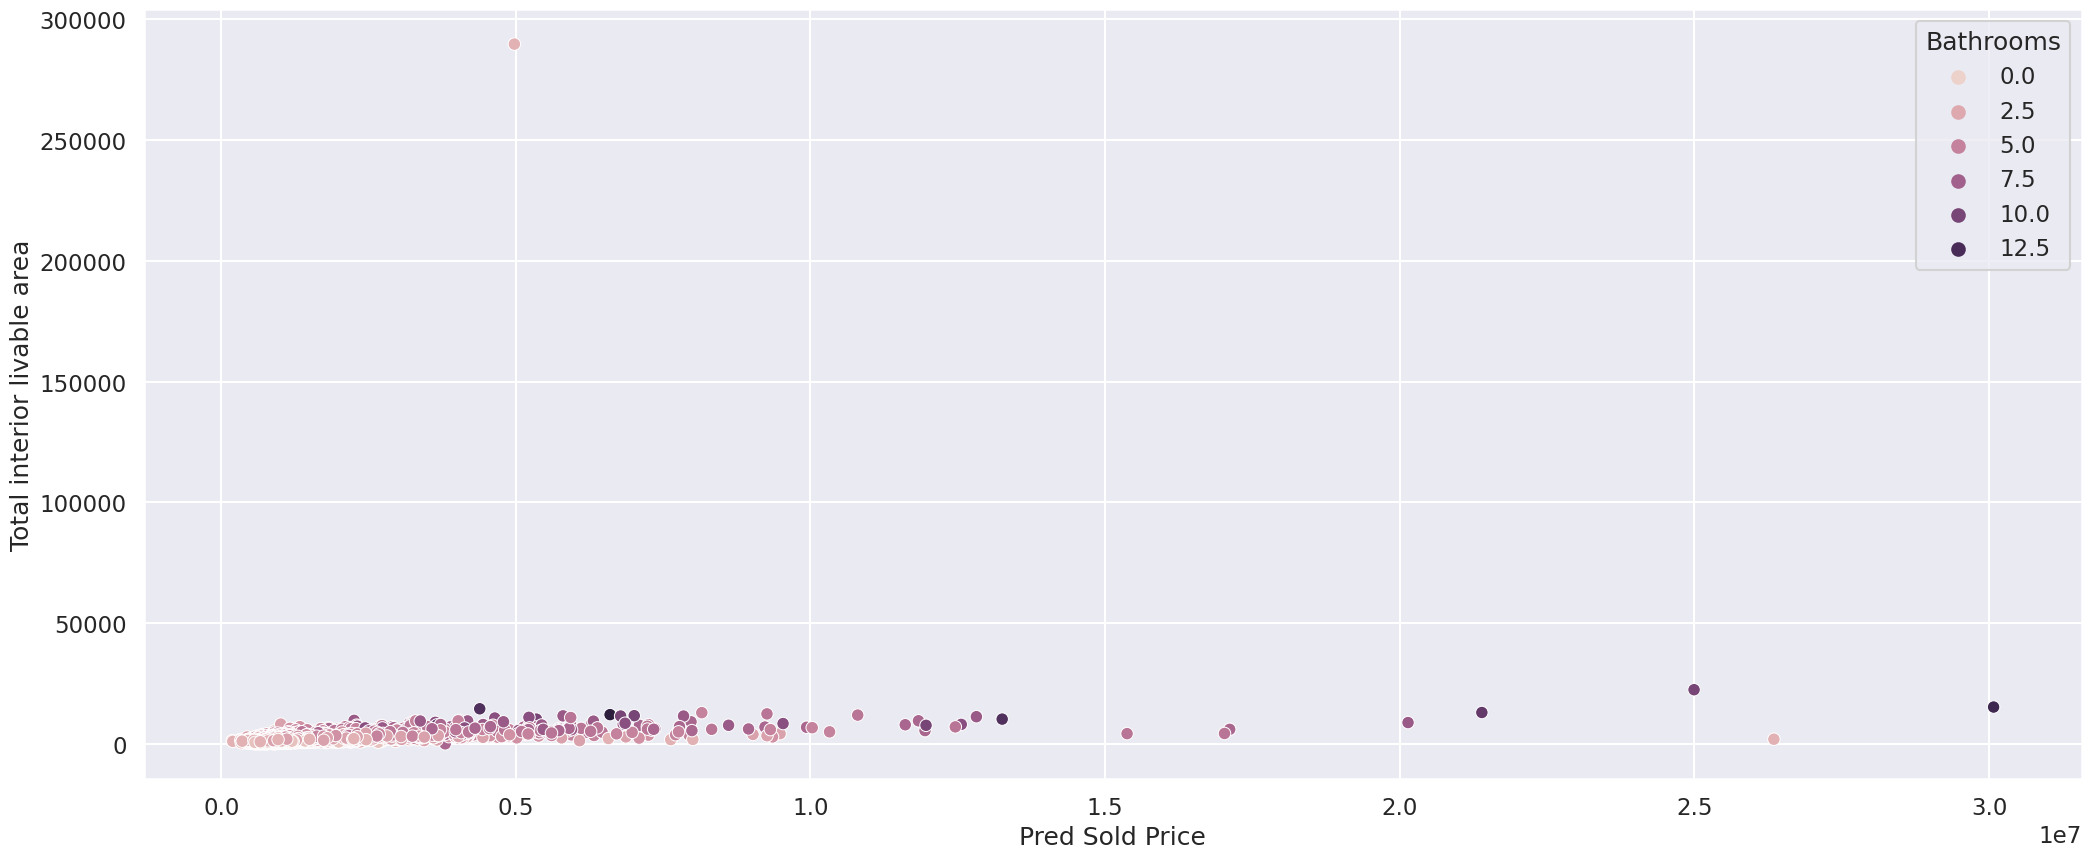

In [53]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Pred Sold Price', y ='Total interior livable area', hue='Bathrooms', data=task_data )

<Axes: xlabel='Pred Sold Price', ylabel='Tax assessed value'>

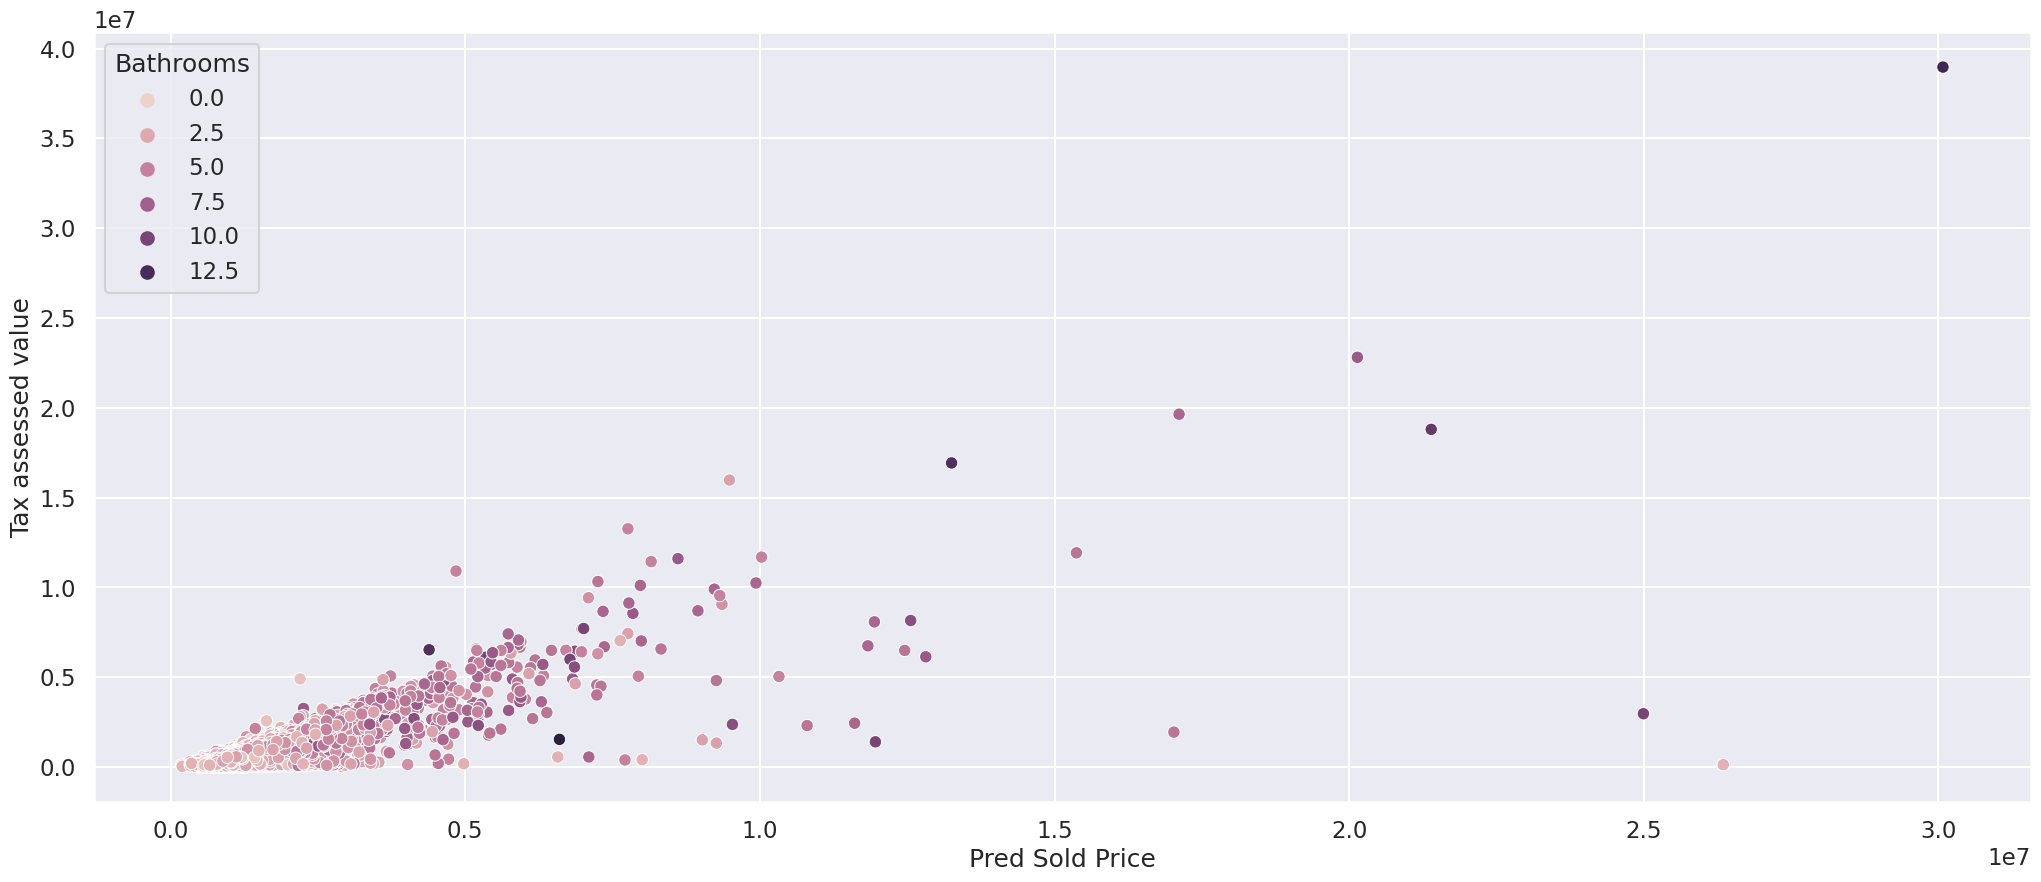

In [54]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Pred Sold Price', y ='Tax assessed value', hue='Bathrooms', data=task_data )

<Axes: xlabel='Pred Sold Price', ylabel='Annual tax amount'>

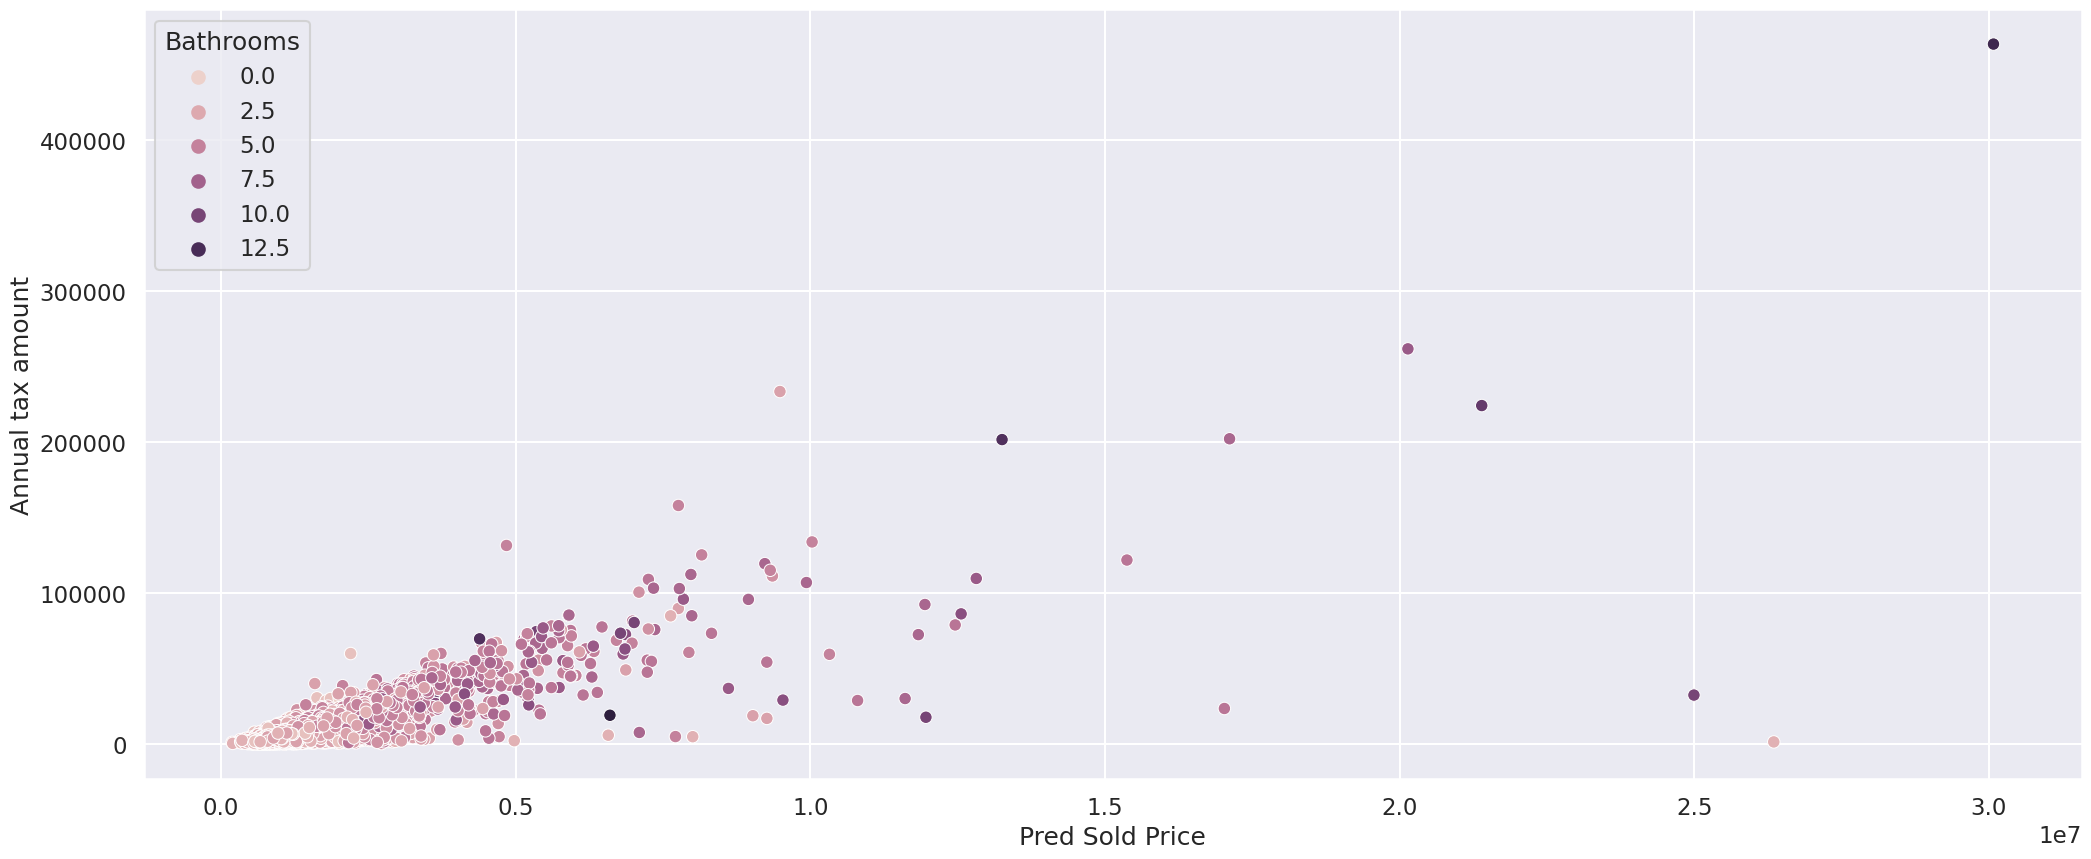

In [55]:
plt.figure( figsize=(25,10) )
seaborn.scatterplot( x='Pred Sold Price', y ='Annual tax amount', hue='Bathrooms', data=task_data )

# KNN

KNN (k Nearest Neighbours) - это метод решения задач классификации и задач регрессии, основанный на поиске ближайших объектов с известными значениями целевой переменной.

![](https://miro.medium.com/v2/resize:fit:587/1*hncgU7vWLBsRvc8WJhxlkQ.png)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor( n_neighbors=5,           # количество соседей, используемых по умолчанию для запросов kneighbors
                            weights='uniform',      # веса всех точек одинаковы
                                                    # distance - вес точки обратно пропорционален расстоянию
                                                    # callable - функция, определяющая вес точки
                           p = 2,                   # номер нормы для вычисления расстояния 
                                                    # 1 - L1, 2 - L2 - частные случаи расстояния Минковского
                           metric = 'minkowski'     # способ вычисления расстояния
                        )

In [57]:
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
print_report("KNN Train", y_train, y_train_pred)

KNN Train
R² = 0.9184
MAE = 135134.0195
MSE = 51540243992.7478


In [58]:
y_test_pred = knn.predict(X_test)
print_report("KNN Test", y_test, y_test_pred)
write_result('KNN', y_test, y_test_pred)

KNN Test
R² = 0.8767
MAE = 166979.4190
MSE = 76878520777.7141


In [59]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV # класс для подбора гиперпараметров моделей (с кросс-валидацией - CV)

knn_gs = GridSearchCV( estimator= knn, # модель
                       param_grid= {'n_neighbors': range(1,10),
                                    'p': [1,2]
                                   },  # значения параметров для перебора
                       scoring='r2',   # название метрики качества или функция её возвращающая
                       cv=None,        # количество разбиений для кросс-валидации (или специальный объект, разбивающий данные); None = 5
                       n_jobs=-1       # подбирать параллельно, с использованием оптимального числа задач
                     )

knn_gs.fit( X_train, y_train )

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10), 'p': [1, 2]},
             scoring='r2')

In [61]:
print( "Лучшие параметры", knn_gs.best_params_ )
print( f"Лучшая общая точность (accuracy) {knn_gs.best_score_:.4f}")

Лучшие параметры {'n_neighbors': 9, 'p': 2}
Лучшая общая точность (accuracy) 0.8915


In [62]:
knn_gs.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': -1,
 'param_grid': {'n_neighbors': range(1, 10), 'p': [1, 2]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'r2',
 'verbose': 0}

# Наивный байес

Наивные байесовские методы представляют собой набор алгоритмов обучения с учителем, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой признаков при заданном значении переменной класса.

**Наивный байес (Гаусс)**

Модель Гаусса предполагает, что все признаки попадают в нормальное распределение. Это означает, что если предикторы принимают непрерывные значения вместо дискретных, то модель предполагает, что эти значения взяты из распределения Гаусса.

$$
P(x_i | y) = \dfrac{1}{\sqrt{2 \pi \sigma^2_y}} \exp (- \dfrac{(x_i - \mu_y)^2}{2\sigma^2_y})
$$

Параметры $\sigma_y$ и $\mu_y$ оцениваются по методу максимального правдоподобия

In [63]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)

print_report("Байес Гаусса Test", y_test, y_test_pred)
write_result('Gaussian NB', y_test, y_test_pred)

Байес Гаусса Test
R² = 0.7537
MAE = 296711.6061
MSE = 238978927123.9823


**Наивный байес (Бернулли)**

Классификатор Бернулли работает аналогично полиномиальному классификатору, но переменные-предикторы являются независимыми булевыми переменными. Например, если конкретное слово присутствует или нет в документе. Эта модель также известна задачами классификации документов. Правило в теореме Бернулиса будет

$$
P(x_i | y) = P(i | y)x_i + (1 - P(i | y))(1 - x_i)
$$

In [64]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_test_pred = bnb.predict(X_test)

print_report("Байес Бернулли Test",y_test, y_test_pred)
write_result('Bernoulli NB', y_test, y_test_pred)

Байес Бернулли Test
R² = 0.4642
MAE = 371764.1417
MSE = 377007786691.6078


# SVM

**Метод опорных векторов** (Support Vector Machines — SVM) — это набор контролируемых методов обучения, используемых для классификации, регрессии и обнаружения выбросов.

$$ \sum_{i \in SV}(\alpha_i — \alpha_i^*) K(x_i, x) + b $$

**Преимущества:**

- Эффективен в пространствах больших размеров.
По-прежнему эффективен в случаях, когда количество измерений превышает количество образцов.
- Использует подмножество обучающих точек в функции принятия решений (называемых опорными векторами), поэтому это также эффективно с точки зрения памяти.
- Универсальность: для функции принятия решения могут быть указаны различные функции ядра. Предоставляются общие ядра, но также можно указать собственные ядра.

**К недостаткам опорных векторных машин можно отнести:**

- Если количество функций намного превышает количество выборок, избегайте чрезмерной подгонки при выборе функций ядра, и термин регуляризации имеет решающее значение.
- SVM не предоставляют напрямую оценки вероятностей, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки.

![](https://miro.medium.com/v2/resize:fit:921/1*06GSco3ItM3gwW2scY6Tmg.png)


In [65]:
from sklearn.svm import SVR # support vectors regressor

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

**kernel** -- указывает тип ядра, который будет использоваться в алгоритме. 

**gamma** -- коэффициент ядра для «rbf», «poly» и «sigmoid». 
- если передается gamma='scale' (по умолчанию), то в качестве значения гаммы используется 1 / (n_features * X.var()), 
- если «авто», использует 1 / n_features 
- если число с плавающей запятой, должно быть неотрицательным.

**C** -- параметр регуляризации.

**epsilon** -- эпсилон в модели epsilon-SVR.

**degree** -- степень полиномиальной функции ядра.

**coef0** -- независимый член в функции ядра.

In [66]:
svr_rbf.fit(X_train, y_train)
y_test_pred = svr_rbf.predict(X_test)

print_report("svr_rbf Test", y_test, y_test_pred)

svr_rbf Test
R² = -147.9000
MAE = 547244.6980
MSE = 699233135431.1600


RBF - показал самый худший результат

In [67]:
svr_lin.fit(X_train, y_train)
y_test_pred = svr_lin.predict(X_test)

print_report("svr_lin Test",y_test, y_test_pred)
write_result('SVM', y_test, y_test_pred)

svr_lin Test
R² = 0.8377
MAE = 165746.1634
MSE = 92885253963.0664


Lin - лидирует

In [68]:
svr_poly.fit(X_train, y_train)
y_test_pred = svr_poly.predict(X_test)

print_report("svr_poly Test", y_test, y_test_pred)

svr_poly Test
R² = 0.5956
MAE = 272209.5159
MSE = 162337374167.6427


Poly - не плохо, но и не хорошо

# Дерево решений

**Дерево решений** (Decision Trees) — это один из алгоритмов машинного обучения, основанный на правиле: «Если <условие>, то <ожидаемый результат>».

![](https://loginom.ru/sites/default/files/blogpost-files/activation-function.svg)

Это непараметрический контролируемый метод обучения, используемый для классификации и регрессии. 

Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из характеристик данных. Дерево можно рассматривать как кусочно-постоянное приближение.

Например, в приведенном ниже примере деревья решений учатся на основе данных аппроксимировать синусоиду набором правил принятия решений «если-то-иначе». Чем глубже дерево, тем сложнее правила принятия решений и тем точнее модель.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

In [69]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 5, random_state = 42) # чем меньше глубина — тем меньше шансов на переобучение
# параметры:
# criterion{“gini”, “entropy”, “log_loss”} — критерий качества правила разделения в узле
# max_depth — максимальная глубина, задаёт регуляризацию, т.е. помогает избежать переобучения; 
# min_samples_split — если в узле обхектов меньше чем заданное, то узел становится листом

dt.fit( X_train, y_train )

DecisionTreeRegressor(max_depth=5, random_state=42)

In [70]:
y_test_pred = dt.predict(X_test)
print_report("Decision Tree Test", y_test, y_test_pred)
write_result('Decision Tree', y_test, y_test_pred)

Decision Tree Test
R² = 0.9118
MAE = 120806.8935
MSE = 61257329545.1457


# Случайный лес

**Случайный лес** — модель, состоящая из множества деревьев решений. 

Вместо того,чтобы просто усреднять прогнозы разных деревьев (такая концепция называется просто «лес»), эта модель использует две ключевые концепции, которые и делают этот лес случайным:
- Случайная выборка образцов из набора данных при построении деревьев.
- При разделении узлов выбираются случайные наборы параметров.

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_test_pred = rf.predict(X_test)
print_report("Random Forest Test", y_test, y_test_pred)
write_result('Random Forest', y_test, y_test_pred)

Random Forest Test
R² = 0.9252
MAE = 104299.2350
MSE = 52277318142.9726


# Голосование

**Голосование** — ансамблевый алгоритм машинного обучения. Для регрессии ансамбль голосования включает в себя прогноз, который является средним значением нескольких других моделей регрессии.

Регрессор голосования — это ансамблевая метаоценка, которая соответствует нескольким базовым регрессорам, каждому из которых соответствует весь набор данных. Затем он усредняет отдельные прогнозы, чтобы сформировать окончательный прогноз.

In [73]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[ ('LinReg', regr),
                                      ('SVM', svr_lin),
                                      ('KNN', knn),
                                      ('KNN_GS', knn_gs),
                                      ('DT', dt),
                                      ('RF', rf)] )
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('LinReg', LinearRegression()),
                            ('SVM', SVR(C=100, gamma='auto', kernel='linear')),
                            ('KNN', KNeighborsRegressor()),
                            ('KNN_GS',
                             GridSearchCV(estimator=KNeighborsRegressor(),
                                          n_jobs=-1,
                                          param_grid={'n_neighbors': range(1, 10),
                                                      'p': [1, 2]},
                                          scoring='r2')),
                            ('DT',
                             DecisionTreeRegressor(max_depth=5,
                                                   random_state=42)),
                            ('RF', RandomForestRegressor(random_state=42))])

In [74]:
y_test_pred = voting.predict(X_test)
print_report("Voting Test", y_test, y_test_pred)
write_result('Voting', y_test, y_test_pred)

Voting Test
R² = 0.9065
MAE = 121401.4944
MSE = 58724399926.9841


# Бэггинг

При бэггинге используется следующий метод:

- Возьмите $b$ образцов с начальной загрузкой из исходного набора данных.

  - Напомним, что бутстрепная выборка — это выборка исходного набора данных, в которой наблюдения берутся с заменой.
- Постройте дерево решений для каждого загруженного образца.

- Усредните прогнозы каждого дерева, чтобы получить окончательную модель.

  - Для деревьев регрессии мы берем среднее значение прогноза, сделанного $B$-деревьями.

  - Для деревьев классификации мы берем наиболее часто встречающееся предсказание, сделанное $B$-деревьями.

  Он особенно полезен для деревьев решений, потому что они по своей природе имеют высокую дисперсию, а бэггинг может значительно уменьшить дисперсию, что приводит к меньшей ошибке теста.

In [75]:
from sklearn.ensemble import BaggingRegressor

# n_estimators - количество базовых оценщиков в ансамбле
# n_jobs - количество заданий, которые должны выполняться параллельно
bagging = BaggingRegressor( DecisionTreeRegressor(max_depth=5, random_state=42),
                            n_estimators = 10,
                            n_jobs = -1)

bagging.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
                 n_jobs=-1)

In [76]:
y_test_pred = bagging.predict(X_test)
print_report("Bagging Test", y_test, y_test_pred)
write_result('Bagging', y_test, y_test_pred)

Bagging Test
R² = 0.9216
MAE = 110474.1721
MSE = 54289124497.2025


# Градиентный спуск

**Градиентный спуск** — метод нахождения минимального значения функции потерь (существует множество видов этой функции). 

Минимизация любой функции означает поиск самой глубокой впадины в этой функции. 

Поиск минимума означает получение наименьшей возможной ошибки или повышение точности модели.

Мы увеличиваем точность, перебирая набор учебных данных при настройке параметров нашей модели (весов и смещений).

![](https://hsto.org/web/2b5/5d6/90d/2b55d690d99e4ec0976b360aae6ce4df.jpg)

![](https://neurohive.io/wp-content/uploads/2018/11/minimum-funkcii-570x309.png)

**Стохастический градиентный спуск** отличается тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

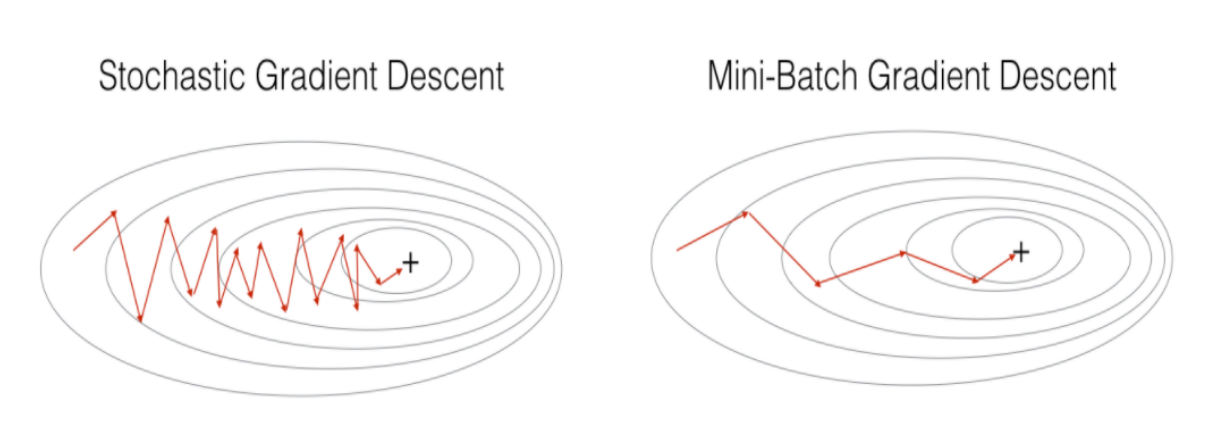

In [77]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor( loss='squared_error',       # squared_error, huber
                    penalty = None,             # регуляризация
                    random_state = 42,
                    learning_rate = 'adaptive') # constant (eta0), optimal,  adaptive, invscaling

sgd.fit(X_train, y_train)

SGDRegressor(learning_rate='adaptive', penalty=None, random_state=42)

In [78]:
y_test_pred = sgd.predict(X_test)
print_report("Gradient Test", y_test, y_test_pred)
write_result('Gradient', y_test, y_test_pred)

Gradient Test
R² = 0.8651
MAE = 132539.7881
MSE = 90205505331.6040


# Градиентный бустинг

**Градиентный бустинг** – алгоритм машинного обучения для решения задач классификации и регрессии. 

Он строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются **деревья решений**. 

Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную. 

Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.

![](https://neurohive.io/wp-content/uploads/2018/11/predskazanija-gradientnogo-bustinga-496x570.png)

![](https://neurohive.io/wp-content/uploads/2018/11/vizualizacija-gradientnogo-bustinga-570x226.png)



In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100,
                                learning_rate=0.1,
                                max_depth=5,
                                random_state = 42,
                                loss='squared_error')

gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [80]:
y_test_pred = gbr.predict(X_test)
print_report("Boosting Test", y_test, y_test_pred)
write_result('Boosting', y_test, y_test_pred)

Boosting Test
R² = 0.9315
MAE = 99996.7641
MSE = 48047042080.3855


# Стэкинг

**Стекинг** (Stacked Generalization или Stacking) — один из самых популярных способов ансамблирования алгоритмов, т.е. использования нескольких алгоритмов для решения одной задачи машинного обучения.

Известно, что если обучить несколько разных алгоритмов, то в задаче регрессии их среднее, а в задаче классификации — голосование по большинству, часто превосходят по качеству все эти алгоритмы.

![](https://media.geeksforgeeks.org/wp-content/uploads/20200713234827/mlxtend.PNG)

In [81]:
from sklearn.ensemble import StackingRegressor

models = [('kNN', knn),        
          ('Tree', dt),
          ('Beg', bagging),
          ('Grad', sgd),
          ('Boost', gbr)]

stk = StackingRegressor(estimators=models, final_estimator=rf)
stk.fit(X_train, y_train)

StackingRegressor(estimators=[('kNN', KNeighborsRegressor()),
                              ('Tree',
                               DecisionTreeRegressor(max_depth=5,
                                                     random_state=42)),
                              ('Beg',
                               BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5,
                                                                                random_state=42),
                                                n_jobs=-1)),
                              ('Grad',
                               SGDRegressor(learning_rate='adaptive',
                                            penalty=None, random_state=42)),
                              ('Boost',
                               GradientBoostingRegressor(max_depth=5,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [82]:
y_test_pred = stk.predict(X_test)
print_report("Stacking Test", y_test, y_test_pred)
write_result('Stacking', y_test, y_test_pred)

Stacking Test
R² = 0.9237
MAE = 108947.7297
MSE = 53182231997.7436


# Заключение

In [95]:
results_df = pd.DataFrame(columns=['Model', 'R² Score'], data=results)
results_df.sort_values(by=['R² Score'], ascending=False)

Model R² Score
10           Boosting   0.9344
6       Random Forest   0.9286
11           Stacking   0.9273
8             Bagging   0.9258
7              Voting   0.9198
5       Decision Tree   0.9163
1                 KNN   0.8950
9            Gradient   0.8768
0   Linear Regression   0.8767
4                 SVM   0.8731
2         Gaussian NB   0.6735
3        Bernoulli NB   0.4849

Как видим наилучший результат показал **градиентный бустинг (0.9344)**, за ним следует **случайный лес (0.9286)** и с примерно похожим результатом закрывает тройку лидеров — **стэкинг (0.9273)**.

Наибольшей точностью обладают методы, основанные на деревьях, а также ансамблевые методы.

Методы основанные на наивном байесе, показали самые худшие результаты:
- Гаусс: 0.6735
- Бернулли: 0.4849

Справедливо отметить, что первые шесть методов *(градиентный бустинг, случайный лес, стэкинг, бэггинг, голосование, дерево решений)* в общем и целом обладают высокой точностью.